# Bank Loan Analysis  
---

In order to monitor and assess the bank's lending activities and performance, we need to create a comprehensive Bank loan report using <b>Microsoft Excel<b>.</b>
    
This report aims at providing insights into key loan-related metrics and their changes over time.</b>

The report will help us make data-driven decisions, track our loan portfolio's health, and identify trends that can inform our lending strategies.</b>

Before we can do this, we must first take a look at the data using <b>Python<b>; data cleaning, wrangling, EDA (Exploratory Data Analysis), and visualization.</b>
    
Once completed we will export the dataset as a .xlsx file and import into Microsoft Excel for report and dashboard creation.</b>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 


%matplotlib inline 

In [2]:
# Load the dataset and name dataframe
bankloan_df = pd.read_csv('financial_loan.csv')
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [3]:
# lets expand the column view so that we can see all of the values
pd.set_option('display.max_columns', 24)

bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,Current,16-06-2021,992381,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,Current,16-06-2021,1192039,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,Current,16-06-2021,1089898,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,Current,16-06-2021,1194971,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [4]:
# lets take a look at how many rows and columns we have
bankloan_df.shape

(38576, 24)

## Data Cleaning and Wrangling 

In [5]:
# lets take a look at the datatypes as well as check for any null values
bankloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

###  We have four date columns which have object datatypes; issue_date, last_credit_pull_date, last_payment_date, and next_payment_date. 

### Lets change these to datetime64 so we can modify the format.

### We also have null values in column emp_title.

In [6]:
# lets change datatype for each date column to datetime64
bankloan_df['issue_date'] = pd.to_datetime(bankloan_df['issue_date'], dayfirst=True)
bankloan_df['last_credit_pull_date'] = pd.to_datetime(bankloan_df['last_credit_pull_date'], dayfirst=True)
bankloan_df['last_payment_date'] = pd.to_datetime(bankloan_df['last_payment_date'], dayfirst=True)
bankloan_df['next_payment_date'] = pd.to_datetime(bankloan_df['next_payment_date'], dayfirst=True)

# lets now create a standard datetime format across all date columns
bankloan_df['issue_date1'] = bankloan_df['issue_date'].dt.strftime('%m/%d/%Y')
bankloan_df['last_credit_pull_date1'] = bankloan_df['last_credit_pull_date'].dt.strftime('%m/%d/%Y')
bankloan_df['last_payment_date1'] = bankloan_df['last_payment_date'].dt.strftime('%m/%d/%Y')
bankloan_df['next_payment_date1'] = bankloan_df['next_payment_date'].dt.strftime('%m/%d/%Y')

In [7]:
# lets verify that the datatypes have been changed
bankloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38576 non-null  int64         
 1   address_state           38576 non-null  object        
 2   application_type        38576 non-null  object        
 3   emp_length              38576 non-null  object        
 4   emp_title               37138 non-null  object        
 5   grade                   38576 non-null  object        
 6   home_ownership          38576 non-null  object        
 7   issue_date              38576 non-null  datetime64[ns]
 8   last_credit_pull_date   38576 non-null  datetime64[ns]
 9   last_payment_date       38576 non-null  datetime64[ns]
 10  loan_status             38576 non-null  object        
 11  next_payment_date       38576 non-null  datetime64[ns]
 12  member_id               38576 non-null  int64 

In [8]:
# lets take a look at the new columns
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021


### We will next create columns weekday and issue_month.

In [9]:
# lets now extract the weekday and issue_month from the issue_date column
bankloan_df['weekday'] = bankloan_df['issue_date'].dt.strftime('%A')
bankloan_df['issue_month'] = bankloan_df['issue_date'].dt.strftime("%B") 

In [10]:
#lets take a look at the new columns
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,0.0100,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021,Thursday,February
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,0.0535,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,0.2088,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021,Tuesday,January
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,0.0540,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021,Thursday,February
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,0.0231,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,0.1986,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021,Sunday,July
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,0.0458,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021,Monday,October
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,0.1734,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,September
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,0.0009,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October


### We will now create column good_bad_loan so that we can seperate loans that are fully paid off or current from those that are charged off. 

In [11]:
# lets create column good_bad_loan and conditions for labeling Good or Bad
bankloan_df['good_bad_loan']= 'Bad'
bankloan_df.loc[ bankloan_df['loan_status']== 'Current', 'good_bad_loan']= 'Good'
bankloan_df.loc[ bankloan_df['loan_status']== 'Fully Paid', 'good_bad_loan']= 'Good'

In [12]:
# lets take a look at the column
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021,Thursday,February,Bad
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021,Tuesday,January,Bad
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021,Thursday,February,Good
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021,Sunday,July,Good
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021,Monday,October,Good
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,September,Good
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October,Good


In [13]:
# how many columns and rows do we now have?
bankloan_df.shape

(38576, 31)

In [14]:
# lets see if there are any duplicated rows
bankloan_df[ bankloan_df.duplicated()]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan


### As you can see above, there are no duplicates

## EDA ( Exploratory Data Analysis ) Process

We will now explore the data for insights into key loan-related metrics.

We will also try to identify trends that can inform our banks lending strategies. 


### Stakeholder Request: 

The Marketing Director would like to know detailed customer insights which will help in her marketing strategies to specific customer segments (attract those with very favorable risk profiles).

### Lets start by looking at the risk classification assigned to each of the loans based on creditworthiness.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 7 :</h1>
<b> What is the distribution of loans by risk classification? </b>    
</div>

In [15]:
# lets take a look at the distribution of loans by risk classification
bankloan_df['grade'].value_counts()

B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: grade, dtype: int64

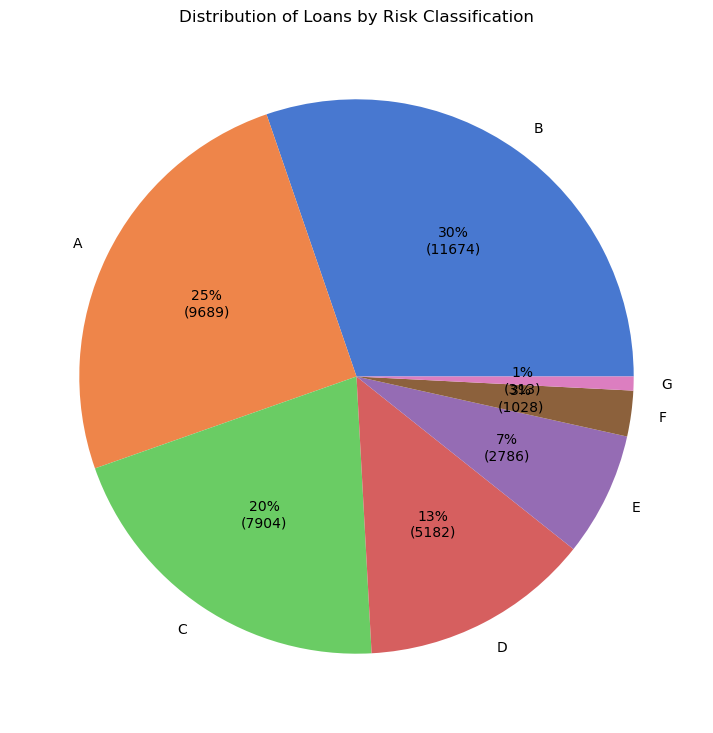

In [16]:
# lets see a distribution of loans by risk classification  
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = bankloan_df['grade'].value_counts()
values = bankloan_df['grade']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('muted') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Loans by Risk Classification')
  
# displaying chart 
plt.show() 

### As you can see:
- B has 30% (11,674) 
- A has 25% (9,689)
- C has 20% (7,904)
- D has 13% (5,182)
- E has  7% (2,786)
- F has  3% (1,028) 
- G has  1% (313)

### Lets see if each assigned risk classification has similar or differing interest rates. 

In [17]:
bankloan_df.groupby(['grade','term'])['int_rate'].describe()

count      mean       std     min     25%     50%  \
grade term                                                             
A      36 months  9274.0  0.073458  0.010394  0.0542  0.0662  0.0749   
       60 months   415.0  0.074907  0.008129  0.0579  0.0691  0.0766   
B      36 months  9075.0  0.110028  0.009058  0.0600  0.1037  0.1099   
       60 months  2599.0  0.111211  0.008739  0.0888  0.1038  0.1111   
C      36 months  5613.0  0.134616  0.009613  0.0600  0.1298  0.1348   
       60 months  2291.0  0.137559  0.008532  0.0600  0.1311  0.1349   
D      36 months  3160.0  0.153528  0.011224  0.0600  0.1461  0.1531   
       60 months  2022.0  0.162696  0.010457  0.0600  0.1557  0.1602   
E      36 months   853.0  0.169589  0.013336  0.0600  0.1632  0.1677   
       60 months  1933.0  0.180346  0.013079  0.0600  0.1682  0.1799   
F      36 months   206.0  0.185726  0.014204  0.1501  0.1790  0.1853   
       60 months   822.0  0.200376  0.013463  0.1780  0.1867  0.2025   
G      36 months    56.0  0.203266  0.010799  0.1734  0.1982  0.2016   
       60 months   257.0  0.216347  0.012776  0.1966  0.2048  0.2127   

                       75%     max  
grade term                          
A      36 months  0.079000  0.0963  
       60 months  0.078800  0.0890  
B      36 months  0.117100  0.1269  
       60 months  0.118600  0.1269  
C      36 months  0.139900  0.1611  
       60 months  0.142200  0.1611  
D      36 months  0.160000  0.1849  
       60 months  0.172700  0.1849  
E      36 months  0.178800  0.2069  
       60 months  0.190300  0.2099  
F      36 months  0.193975  0.2235  
       60 months  0.212800  0.2294  
G      36 months  0.211575  0.2322  
       60 months  0.227400  0.2459

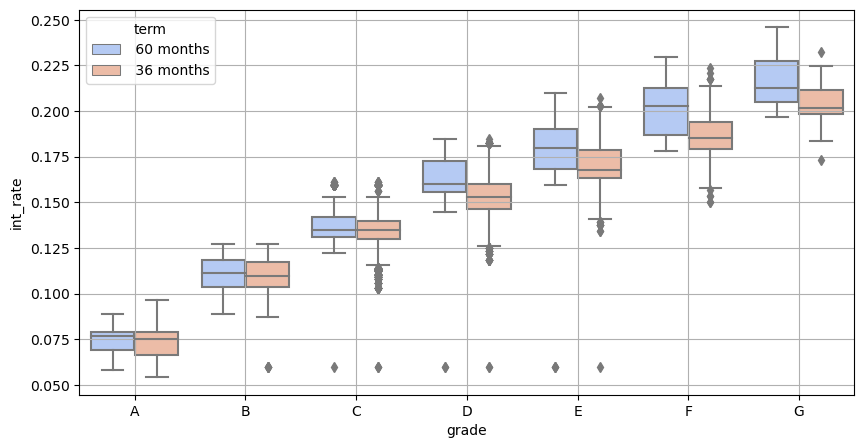

In [18]:
# lets visually take a look at the risk classification by interest rate
plt.figure(figsize=(10, 5))
sns.boxplot(x="grade", y="int_rate", order=['A','B','C','D','E','F','G'], hue= "term", data=bankloan_df, palette="coolwarm")
plt.grid()

### As you can see, higher grades signify lower interest rates.

### Lets see if each assigned risk classification has similar or differing customer DTI ratios.

In [19]:
bankloan_df.groupby(['grade','term'])['dti'].describe()

count      mean       std     min       25%      50%  \
grade term                                                                
A      36 months  9274.0  0.120190  0.069755  0.0000  0.064625  0.11495   
       60 months   415.0  0.124696  0.069168  0.0028  0.073800  0.11890   
B      36 months  9075.0  0.133355  0.064942  0.0000  0.083500  0.13490   
       60 months  2599.0  0.137692  0.071368  0.0000  0.083300  0.13730   
C      36 months  5613.0  0.136569  0.063847  0.0000  0.088300  0.13960   
       60 months  2291.0  0.145478  0.066244  0.0000  0.098050  0.14490   
D      36 months  3160.0  0.135577  0.064263  0.0000  0.085075  0.13895   
       60 months  2022.0  0.146419  0.061992  0.0000  0.104100  0.15015   
E      36 months   853.0  0.131987  0.065632  0.0000  0.083000  0.13340   
       60 months  1933.0  0.144909  0.062514  0.0000  0.098900  0.14990   
F      36 months   206.0  0.132804  0.066693  0.0000  0.083200  0.13870   
       60 months   822.0  0.143977  0.059549  0.0038  0.099575  0.14935   
G      36 months    56.0  0.135330  0.068056  0.0000  0.074250  0.14030   
       60 months   257.0  0.141741  0.061398  0.0000  0.087700  0.14850   

                       75%     max  
grade term                          
A      36 months  0.170300  0.2999  
       60 months  0.179450  0.2989  
B      36 months  0.185300  0.2993  
       60 months  0.191900  0.2995  
C      36 months  0.187900  0.2895  
       60 months  0.197650  0.2956  
D      36 months  0.187550  0.2915  
       60 months  0.196750  0.2963  
E      36 months  0.185000  0.2491  
       60 months  0.196500  0.2819  
F      36 months  0.185150  0.2942  
       60 months  0.189575  0.2497  
G      36 months  0.194125  0.2452  
       60 months  0.195100  0.2469

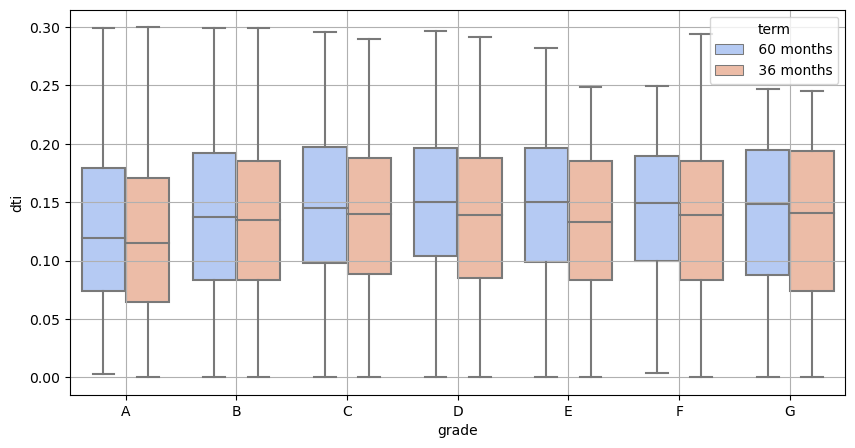

In [20]:
# lets visually take a look at the risk classification by DTI Ratio
plt.figure(figsize=(10, 5))
sns.boxplot(x="grade", y="dti", order=['A','B','C','D','E','F','G'],hue= "term", data=bankloan_df, palette="coolwarm")
plt.grid()

### As you can see, loans with a risk classification of A and B also have the lowest customer DTI ratios in comparrison to the others.

### Does annual income play a role in risk classifications or not? 

In [21]:
pd.set_option("display.float_format", "${:,.2f}".format)

(
    bankloan_df.groupby("grade").agg(
        min_income=("annual_income", "min"),
        average_income=("annual_income", "mean"),
        max_income=("annual_income", "max"),
    )
)

,min_income,average_income,max_income
grade,,,
A,"$5,500.00","$67,533.99","$1,900,000.00"
B,"$4,080.00","$68,320.58","$3,900,000.00"
C,"$4,000.00","$68,482.66","$6,000,000.00"
D,"$4,800.00","$69,092.81","$1,200,000.00"
E,"$4,200.00","$78,328.38","$750,000.00"
F,"$12,000.00","$85,115.68","$600,000.00"
G,"$17,652.00","$94,724.94","$725,000.00"


### As you can see, there are high and low annual salaries within each risk classification, so no impact whatsoever.

### Lets see if there's a relationship between employment length and the risk classification of a loan. 

In [22]:
# lets see the distribution of employment length of time
bankloan_df['emp_length'].value_counts()

10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: emp_length, dtype: int64

In [23]:
bankloan_df.pivot_table(
    values=["id"],
    index=["grade"],
    columns="emp_length",
    aggfunc=["count"],
    margins=True,
    margins_name="Total Loans Submitted",
)

count                                            \
                          id                                             
emp_length            1 year 10+ years 2 years 3 years 4 years 5 years   
grade                                                                    
A                        748      2296    1019    1006     840     828   
B                       1017      2669    1415    1259    1003    1032   
C                        720      1689     889     865     710     620   
D                        449      1162     599     547     497     445   
E                        202       692     325     269     251     234   
F                         77       278     110     104      96      93   
G                         16        84      25      38      31      21   
Total Loans Submitted   3229      8870    4382    4088    3428    3273   

                                                                \
                                                                 
emp_length            6 years 7 years 8 years 9 years < 1 year   
grade                                                            
A                         569     434     405     341     1203   
B                         657     531     427     375     1289   
C                         459     378     290     243     1041   
D                         296     232     201     162      592   
E                         174     125     101     100      313   
F                          56      53      41      21       99   
G                          17      19      11      13       38   
Total Loans Submitted    2228    1772    1476    1255     4575   

                                             
                                             
emp_length            Total Loans Submitted  
grade                                        
A                                      9689  
B                                     11674  
C                                      7904  
D                                      5182  
E                                      2786  
F                                      1028  
G                                       313  
Total Loans Submitted                 38576

### As you can see from the above table, the largest percent of loans within each employee length category falls within risk classifications A and B.

 Those employed for 10 plus years have the highest count of received loans; 23% ( 8,870 ), than any other year. Risk classifiaction A has 26% ( 2,296 ) of those loans, while risk classification B has 30% ( 2,669 ) of the remainder. 

So, there is a relationship between customers having been employed for 10 plus years with loans in risk classification A and B, in addition to a large percentage of loans from other years falling within same categories as well. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 8 :</h1>
<b> We know that the risk classification assigned to a loan represents a customers creditworthiness; higher grades signify lower risk. How do loans assigned a grade of A and B differ from all the others?</b>    
</div>

- Loans with a risk classification of A and B have the lowest interest rates overall, with creditors also having the lowest DTI ratio scores.

- Although risk classification A and B do not have the highest annual salaries overall, they make up the largest groups within employee length containing those employed for 10 plus years. 

- Risk classification A and B also have the highest concentration of loans within each employment length category.

### Customer Insights selection:
- The customer insights we will be using for the marketing campaign will come from those within risk classification A.

 - Customers in this category have a much lower interest rate and DTI ratio score than those in risk classification B.  
 
 - Risk classification A also has the most number of loans with a 36 month term than any other classification; interest rate is much lower than a 60 month term loan.

>note: Risk classification A has a significantly lower risk than B.

### Lets now create a dataset for risk classification A.

In [24]:
# lets take a look at the full dataset once more
pd.set_option('display.max_columns', 31)

bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,1314167,car,C4,60 months,Source Verified,"$30,000.00",$0.01,$59.83,$0.15,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021,Thursday,February,Bad
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1288686,car,E1,36 months,Source Verified,"$48,000.00",$0.05,$109.43,$0.19,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,1304116,car,C5,36 months,Not Verified,"$50,000.00",$0.21,$421.65,$0.16,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021,Tuesday,January,Bad
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,1272024,car,B2,60 months,Source Verified,"$42,000.00",$0.05,$97.06,$0.11,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021,Thursday,February,Good
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,"$83,000.00",$0.02,$106.53,$0.06,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,992381,wedding,C1,60 months,Verified,"$100,000.00",$0.20,$551.64,$0.13,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021,Sunday,July,Good
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,1192039,wedding,C1,60 months,Verified,"$50,000.00",$0.05,$579.72,$0.13,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021,Monday,October,Good
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,1089898,wedding,D5,60 months,Verified,"$65,000.00",$0.17,$627.93,$0.17,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,September,Good
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,1194971,wedding,D5,60 months,Verified,"$368,000.00",$0.00,$612.72,$0.18,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October,Good


In [25]:
grade_a = bankloan_df[bankloan_df['grade']== "A"].copy()
grade_a

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,"$83,000.00",$0.02,$106.53,$0.06,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
7,1066424,PA,INDIVIDUAL,10+ years,SCI Mahanoy,A,OWN,2021-06-11,2021-07-14,2021-07-14,Fully Paid,2021-08-14,1291243,car,A4,36 months,Source Verified,"$59,000.00",$0.07,$172.10,$0.08,5500,23,6172,06/11/2021,07/14/2021,07/14/2021,08/14/2021,Friday,June,Good
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,Charged Off,2021-11-12,1299335,car,A5,36 months,Verified,"$116,400.00",$0.04,$762.08,$0.09,24000,31,8650,09/02/2021,06/15/2021,10/12/2021,11/12/2021,Thursday,September,Bad
20,112245,WI,INDIVIDUAL,6 years,Norman G. Olson Insurance,A,RENT,2021-07-07,2021-04-16,2021-08-10,Fully Paid,2021-09-10,112227,car,A2,36 months,Not Verified,"$40,000.00",$0.03,$155.38,$0.07,5000,7,5594,07/07/2021,04/16/2021,08/10/2021,09/10/2021,Wednesday,July,Good
21,207910,FL,INDIVIDUAL,< 1 year,NaN,A,MORTGAGE,2021-01-08,2021-05-16,2021-02-10,Charged Off,2021-03-10,183496,car,A2,36 months,Not Verified,"$120,000.00",$0.08,$69.14,$0.07,2225,20,2508,01/08/2021,05/16/2021,02/10/2021,03/10/2021,Friday,January,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38428,696966,NY,INDIVIDUAL,1 year,General Investment Authority,A,RENT,2021-03-11,2021-02-16,2021-03-16,Fully Paid,2021-04-16,888193,wedding,A4,60 months,Source Verified,"$25,200.00",$0.25,$79.76,$0.07,4000,16,4785,03/11/2021,02/16/2021,03/16/2021,04/16/2021,Thursday,March,Good
38429,884946,PA,INDIVIDUAL,10+ years,Crayola,A,RENT,2021-09-11,2021-01-16,2021-12-15,Fully Paid,2022-01-15,1100530,wedding,A5,60 months,Source Verified,"$42,000.00",$0.07,$265.09,$0.09,12800,15,15811,09/11/2021,01/16/2021,12/15/2021,01/15/2022,Saturday,September,Good
38430,969629,NY,INDIVIDUAL,< 1 year,forrest hills high school,A,RENT,2021-10-11,2021-04-16,2021-03-15,Fully Paid,2021-04-15,1190856,wedding,A5,60 months,Source Verified,"$75,000.00",$0.02,$248.52,$0.09,12000,18,14330,10/11/2021,04/16/2021,03/15/2021,04/15/2021,Monday,October,Good
38493,602925,MD,INDIVIDUAL,7 years,Gilbane Building Company,A,MORTGAGE,2021-10-10,2021-10-14,2021-10-14,Fully Paid,2021-11-14,773596,wedding,A4,60 months,Verified,"$88,000.00",$0.22,$219.36,$0.07,11200,36,13055,10/10/2021,10/14/2021,10/14/2021,11/14/2021,Sunday,October,Good


### Lets now take a look at each loan purpose and the distribution of loan applications within each.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 9 :</h1>
<b> Within risk classification A, which loan purpose has the largest amount of applicants, and which has the least?</b>    
</div>

In [26]:
grade_a['purpose'].value_counts()

Debt consolidation    3753
credit card           1353
other                 1024
home improvement       933
major purchase         796
car                    577
small business         334
wedding                237
medical                197
moving                 164
vacation               122
house                   91
educational             79
renewable_energy        29
Name: purpose, dtype: int64

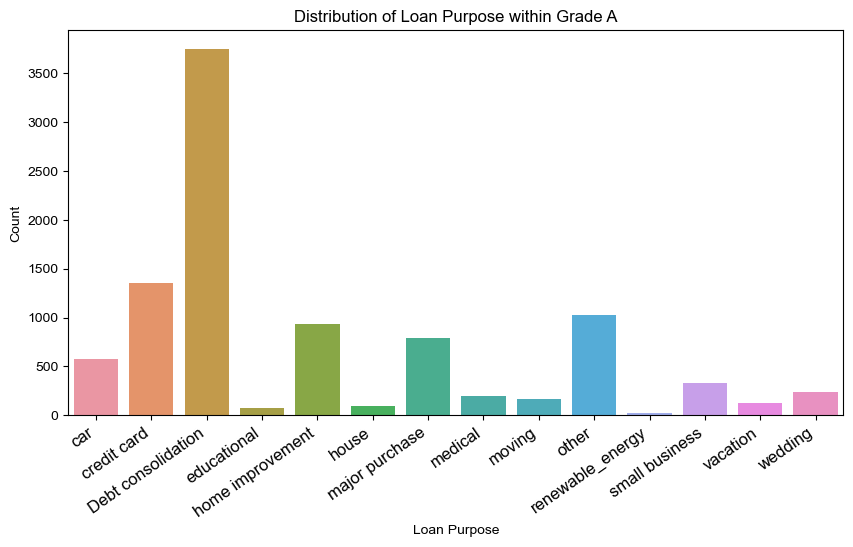

In [27]:
# lets take a look at the distribution of Loans by Purpose
plt.figure(figsize=(10, 5))
sns.countplot(data=grade_a, x='purpose')
sns.set_style('whitegrid')
plt.title('Distribution of Loan Purpose within Grade A')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.show()

### As you can see from the above plot, debt consolidation makes up 39% ( 3,753 ) of all grade A loans while renewable_energy comes in last with 0.3% ( 29 ).

### Lets now see if there is a difference with interest rates between each loan purpose.

In [28]:
pd.set_option("display.float_format", "{:,.2f}".format)

grade_a.groupby('purpose')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
Debt consolidation,"3,753.00",0.07,0.01,0.05,0.07,0.07,0.08,0.10
car,577.00,0.07,0.01,0.05,0.06,0.07,0.08,0.10
credit card,"1,353.00",0.07,0.01,0.05,0.07,0.08,0.08,0.10
educational,79.00,0.08,0.01,0.06,0.08,0.08,0.09,0.10
home improvement,933.00,0.07,0.01,0.05,0.06,0.07,0.08,0.10
house,91.00,0.07,0.01,0.05,0.07,0.08,0.08,0.10
major purchase,796.00,0.07,0.01,0.05,0.06,0.07,0.08,0.10
medical,197.00,0.07,0.01,0.05,0.07,0.07,0.08,0.10
moving,164.00,0.07,0.01,0.05,0.07,0.07,0.08,0.10


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 10 :</h1>
<b> Within risk classification A, which loan purpose has the lowest and highest interest rates within this category?</b>   </div>

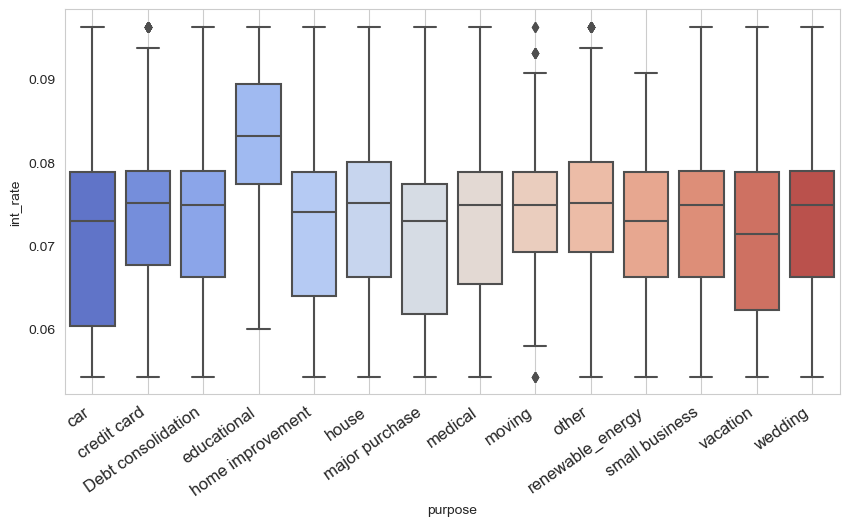

In [29]:
# lets take a look at the interest rate by each loan purpose
plt.figure(figsize=(10, 5))
sns.boxplot(x="purpose", y="int_rate", data= grade_a, palette="coolwarm")
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.grid()

### As you can see from the above, car loans have on average the lowest interest rates within the entire category, as opposed to educational loans which has the highest interest rates. 

###  Lets now gather insights from debt consolidation since it has the largest pool of applicants.

In [30]:
# lets take a closer look at the data for debt consolidation 
a_debtcon = grade_a[grade_a['purpose']== 'Debt consolidation'].copy()
a_debtcon

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
6500,1069742,CA,INDIVIDUAL,6 years,Network Interpreting Service,A,RENT,2021-12-11,2021-02-16,2021-07-12,Fully Paid,2021-08-12,1304855,Debt consolidation,A1,36 months,Not Verified,"77,385.19",0.10,280.01,0.06,9200,28,9460,12/11/2021,02/16/2021,07/12/2021,08/12/2021,Saturday,December,Good
6505,1032111,NY,INDIVIDUAL,7 years,NaN,A,MORTGAGE,2021-12-11,2021-12-14,2021-05-16,Fully Paid,2021-06-16,1261745,Debt consolidation,A3,36 months,Source Verified,"17,108.00",0.20,136.11,0.08,4375,12,4900,12/11/2021,12/14/2021,05/16/2021,06/16/2021,Saturday,December,Good
6506,1069539,NJ,INDIVIDUAL,5 years,Audubon Mutual Housing Corporation,A,MORTGAGE,2021-12-11,2021-02-16,2021-06-16,Fully Paid,2021-07-16,1304608,Debt consolidation,A4,36 months,Verified,"75,000.00",0.14,995.82,0.08,31825,26,34887,12/11/2021,02/16/2021,06/16/2021,07/16/2021,Saturday,December,Good
6508,1069591,OR,INDIVIDUAL,2 years,Good Samaritan Society,A,RENT,2021-12-11,2021-05-16,2021-11-11,Fully Paid,2021-12-11,1304289,Debt consolidation,A5,36 months,Verified,"24,044.00",0.12,158.77,0.09,5000,16,5716,12/11/2021,05/16/2021,11/11/2021,12/11/2021,Saturday,December,Good
6509,1069357,OH,INDIVIDUAL,1 year,Gateway Hospice,A,RENT,2021-12-11,2021-05-16,2021-08-10,Fully Paid,2021-09-10,1304251,Debt consolidation,A4,36 months,Verified,"45,000.00",0.08,469.36,0.08,15000,27,16663,12/11/2021,05/16/2021,08/10/2021,09/10/2021,Saturday,December,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,987401,CA,INDIVIDUAL,10+ years,State of California,A,MORTGAGE,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,1211371,Debt consolidation,A5,60 months,Source Verified,"85,356.00",0.21,229.88,0.09,11100,39,12392,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October,Good
24265,1027372,NV,INDIVIDUAL,3 years,sterling autobody,A,MORTGAGE,2021-11-11,2021-05-16,2021-05-16,Current,2021-06-16,1256723,Debt consolidation,A5,60 months,Source Verified,"50,400.00",0.20,265.09,0.09,12800,13,14005,11/11/2021,05/16/2021,05/16/2021,06/16/2021,Thursday,November,Good
24266,1033437,FL,INDIVIDUAL,4 years,zakheim and lavrar,A,MORTGAGE,2021-11-11,2021-05-16,2021-05-16,Current,2021-06-16,1263008,Debt consolidation,A5,60 months,Source Verified,"65,508.00",0.07,173.97,0.09,8400,23,9188,11/11/2021,05/16/2021,05/16/2021,06/16/2021,Thursday,November,Good
24589,1053539,CA,INDIVIDUAL,3 years,24 Hour Fitness,A,RENT,2021-12-11,2021-05-16,2021-05-16,Current,2021-06-16,1285340,Debt consolidation,A5,60 months,Verified,"26,400.00",0.27,279.07,0.09,13475,22,14760,12/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,December,Good


### Lets take a look at the loan status within debt consolidation.

In [31]:
a_debtcon['loan_status'].value_counts()

Fully Paid     3514
Charged Off     229
Current          10
Name: loan_status, dtype: int64

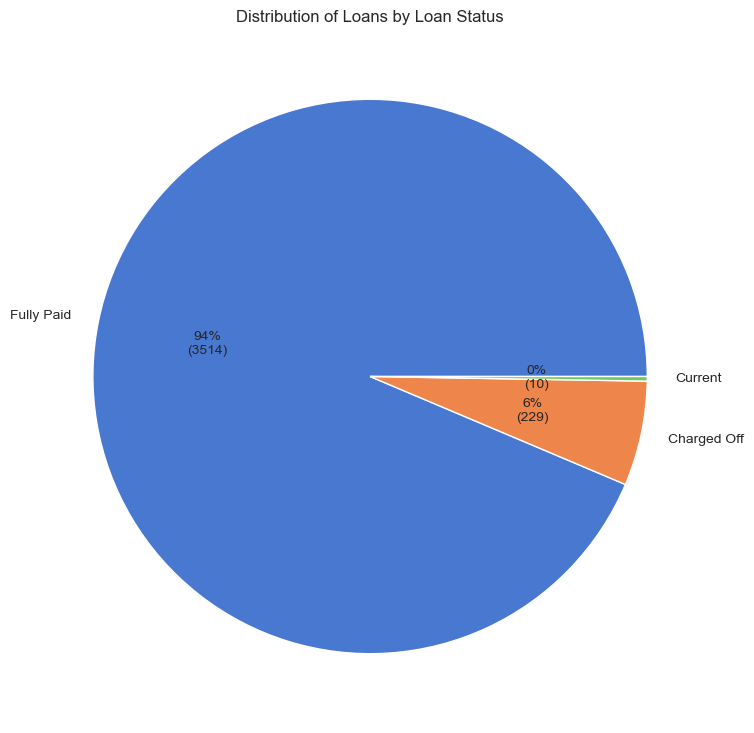

In [32]:
# lets see the distribution of loans by their loan status  
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = a_debtcon['loan_status'].value_counts()
values = a_debtcon['loan_status']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('muted') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Loans by Loan Status')
  
# displaying chart 
plt.show() 

### As you can see, 94% ( 3,514 ) of the loans have been fully paid off, 0.3% ( 10 ) are current, while 6% ( 229 ) have been charged off.

### Lets take a look at loans which have been fully paid off.

In [33]:
a_fullyp = a_debtcon[ a_debtcon['loan_status']== 'Fully Paid'].copy()
a_fullyp

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
6500,1069742,CA,INDIVIDUAL,6 years,Network Interpreting Service,A,RENT,2021-12-11,2021-02-16,2021-07-12,Fully Paid,2021-08-12,1304855,Debt consolidation,A1,36 months,Not Verified,"77,385.19",0.10,280.01,0.06,9200,28,9460,12/11/2021,02/16/2021,07/12/2021,08/12/2021,Saturday,December,Good
6505,1032111,NY,INDIVIDUAL,7 years,NaN,A,MORTGAGE,2021-12-11,2021-12-14,2021-05-16,Fully Paid,2021-06-16,1261745,Debt consolidation,A3,36 months,Source Verified,"17,108.00",0.20,136.11,0.08,4375,12,4900,12/11/2021,12/14/2021,05/16/2021,06/16/2021,Saturday,December,Good
6506,1069539,NJ,INDIVIDUAL,5 years,Audubon Mutual Housing Corporation,A,MORTGAGE,2021-12-11,2021-02-16,2021-06-16,Fully Paid,2021-07-16,1304608,Debt consolidation,A4,36 months,Verified,"75,000.00",0.14,995.82,0.08,31825,26,34887,12/11/2021,02/16/2021,06/16/2021,07/16/2021,Saturday,December,Good
6508,1069591,OR,INDIVIDUAL,2 years,Good Samaritan Society,A,RENT,2021-12-11,2021-05-16,2021-11-11,Fully Paid,2021-12-11,1304289,Debt consolidation,A5,36 months,Verified,"24,044.00",0.12,158.77,0.09,5000,16,5716,12/11/2021,05/16/2021,11/11/2021,12/11/2021,Saturday,December,Good
6509,1069357,OH,INDIVIDUAL,1 year,Gateway Hospice,A,RENT,2021-12-11,2021-05-16,2021-08-10,Fully Paid,2021-09-10,1304251,Debt consolidation,A4,36 months,Verified,"45,000.00",0.08,469.36,0.08,15000,27,16663,12/11/2021,05/16/2021,08/10/2021,09/10/2021,Saturday,December,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,599558,MN,INDIVIDUAL,< 1 year,Fraser Child and Family Center,A,RENT,2021-10-10,2021-12-13,2021-12-13,Fully Paid,2022-01-13,769520,Debt consolidation,A5,60 months,Verified,"31,800.00",0.16,197.59,0.07,10000,20,11556,10/10/2021,12/13/2021,12/13/2021,01/13/2022,Sunday,October,Good
23480,616877,CA,INDIVIDUAL,3 years,Northrop Grumman,A,RENT,2021-11-10,2021-05-16,2021-02-14,Fully Paid,2021-03-14,779869,Debt consolidation,A4,60 months,Verified,"54,000.00",0.22,199.77,0.07,15000,51,11722,11/10/2021,05/16/2021,02/14/2021,03/14/2021,Wednesday,November,Good
23481,609496,GA,INDIVIDUAL,4 years,Unisource Worldwide,A,RENT,2021-11-10,2021-04-16,2021-11-15,Fully Paid,2021-12-15,781782,Debt consolidation,A5,60 months,Verified,"59,000.00",0.13,39.52,0.07,2000,22,2371,11/10/2021,04/16/2021,11/15/2021,12/15/2021,Wednesday,November,Good
23482,604333,CA,INDIVIDUAL,5 years,"Littler Mendelson, P.C.",A,RENT,2021-11-10,2021-10-12,2021-10-12,Fully Paid,2021-11-12,775346,Debt consolidation,A5,60 months,Verified,"65,000.00",0.18,295.40,0.07,24000,34,16612,11/10/2021,10/12/2021,10/12/2021,11/12/2021,Wednesday,November,Good


In [34]:
# lets look at the distribution of loans by term
a_fullyp['term'].value_counts()

 36 months    3392
 60 months     122
Name: term, dtype: int64

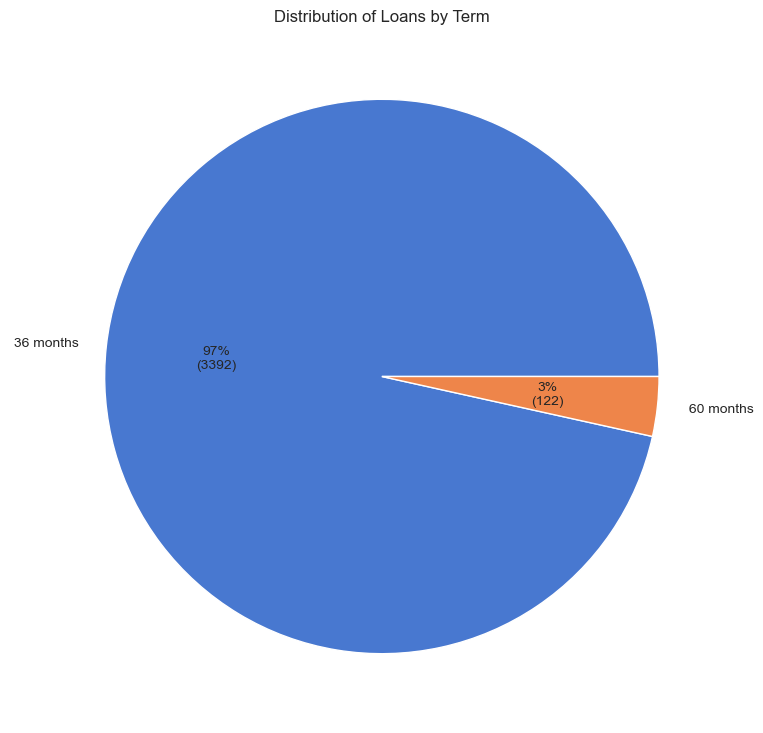

In [35]:
# lets see the distribution of loans by term  
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = a_fullyp['term'].value_counts()
values =a_fullyp['term']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('muted') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Loans by Term')
  
# displaying chart 
plt.show() 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 11 :</h1>
<b> Within risk classification A, there are loans with a 36 and 60 month fixed rate. What is the distribution of loans within each and their differences by interest rate?</b>    
</div>

In [36]:
# lets also look at interest rate by term
pd.set_option("display.float_format", "{:,.2f}".format)

a_fullyp.groupby('term')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36 months,"3,392.00",0.07,0.01,0.05,0.07,0.07,0.08,0.10
60 months,122.00,0.07,0.01,0.06,0.07,0.07,0.08,0.09


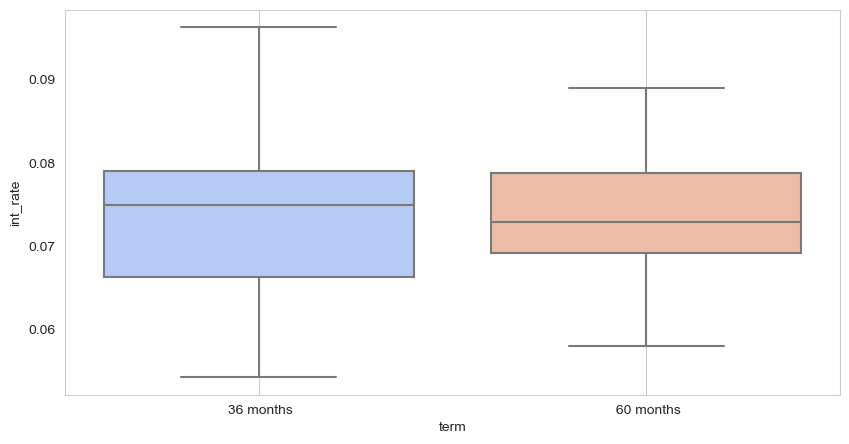

In [37]:
# lets visually see interest rate by loan term
plt.figure(figsize=(10, 5))
sns.boxplot(x="term", y="int_rate", data=a_fullyp, palette="coolwarm")
plt.grid()

### As you can see from the above plots:
- 97% (3,392) of the loans have a 36 month fixed term, while 3% (122) have a 60 month fixed term.
- The interest rate on 36 month term loans are much lower in comparison to the 60 month term loans.

### lets take a look at the interest rate on 36 and 60 month term loans by home ownership.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 12 :</h1>
<b> Within risk classification A, which home ownership group has the most applications submitted? Which has the lowest interest rate for a 36 and 60 month term loan?</b>    
</div>

In [38]:
a_fullyp.groupby(['home_ownership','term'])['int_rate'].describe()

count  mean  std  min  25%  50%  75%  max
home_ownership term                                                   
MORTGAGE        36 months 1,558.00  0.07 0.01 0.05 0.07 0.07 0.08 0.10
                60 months    80.00  0.07 0.01 0.06 0.07 0.07 0.08 0.09
NONE            36 months     1.00  0.08  NaN 0.08 0.08 0.08 0.08 0.08
OTHER           36 months     6.00  0.09 0.01 0.08 0.08 0.09 0.10 0.10
OWN             36 months   264.00  0.07 0.01 0.05 0.07 0.07 0.08 0.10
                60 months     6.00  0.08 0.01 0.07 0.07 0.08 0.08 0.09
RENT            36 months 1,563.00  0.07 0.01 0.05 0.07 0.07 0.08 0.10
                60 months    36.00  0.07 0.01 0.06 0.07 0.07 0.08 0.09

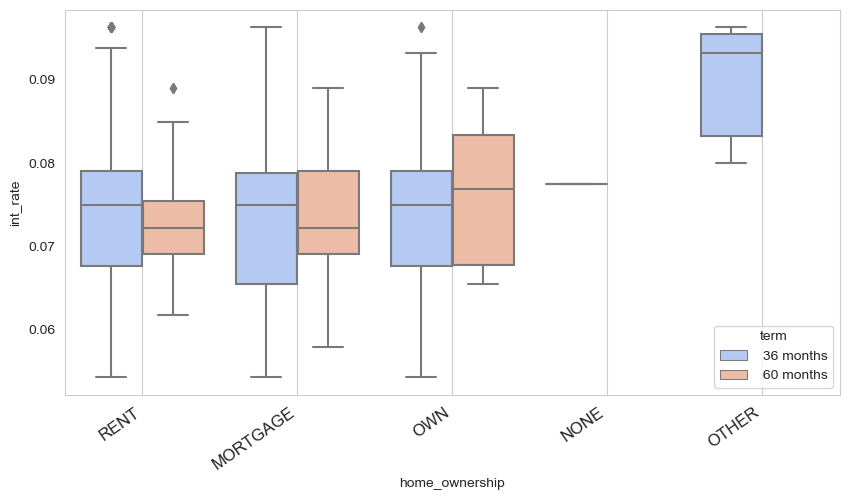

In [39]:
# lets take a look at the interest rate by home ownership
plt.figure(figsize=(10, 5))
sns.boxplot(x="home_ownership", y="int_rate", hue= 'term',data=a_fullyp, palette="coolwarm")
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.grid()

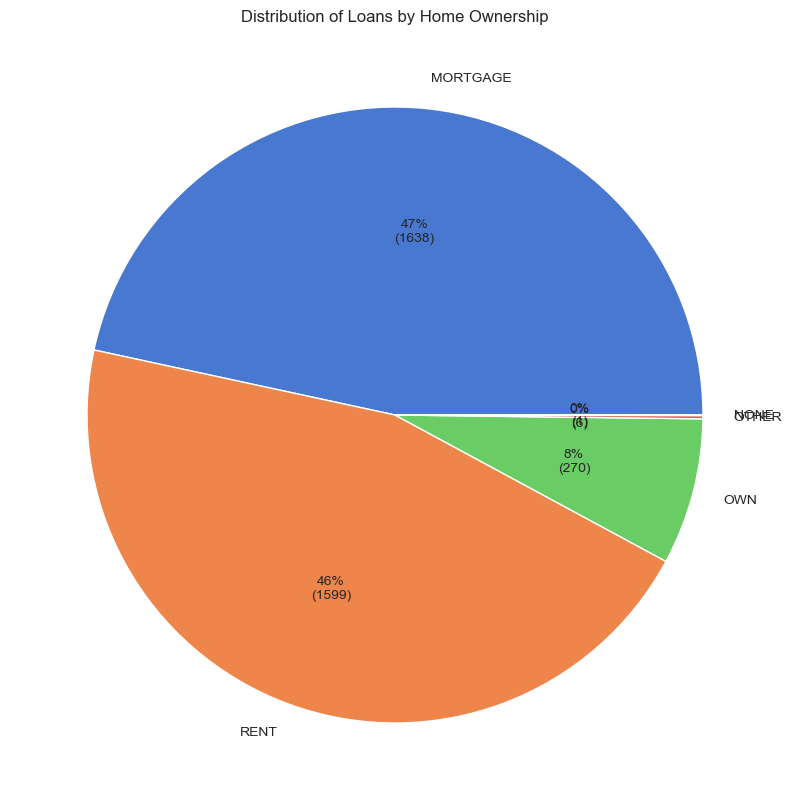

In [40]:
# lets see the distribution of loans by home ownership  
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = a_fullyp['home_ownership'].value_counts()
values =a_fullyp['home_ownership']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)

# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use 
palette_color = seaborn.color_palette('muted') 
plt.figure(figsize=(10, 10))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Loans by Home Ownership')
# plotting data on chart 
plt.figure
  
# displaying chart 
plt.show() 

### As you can see from the above plots:

- 47% (1,638) of the applicants have a mortgage, 46% (1,599) rent, 8% (270) own, while 1% (6) is classified as other.
- Within the home ownership category, those with a mortgage have the lowest overall interest rate for a 36 month term loan, while those in other have the highest.
- Those with a mortgage also have the lowest interest rate for a 60 month term loan, while those who own have the highest.

### Lets now take a look at the states where each applicant resides.

In [41]:
a_fullyp['address_state'].nunique()

45

In [42]:
a_fullyp['address_state'].value_counts()

CA    612
NY    327
FL    240
TX    228
NJ    176
MA    148
PA    144
GA    132
VA    128
IL    109
OH    105
MD     83
NC     77
CO     76
WA     74
CT     72
MN     71
AZ     61
MO     60
MI     57
AL     52
OR     49
LA     44
WI     41
SC     36
KY     32
NV     30
AR     26
OK     25
DC     24
KS     23
RI     23
UT     21
NM     20
NH     19
WV     16
HI     16
DE      9
VT      8
SD      7
AK      6
WY      3
MT      2
IA      1
TN      1
Name: address_state, dtype: int64

### As you can see, applicants reside in 45 states. 

### Lets now see which states have applicants paying the least interest rates either having a mortgage, renting or owning property.

## Mortgage:

In [43]:
mortgage_df = a_fullyp[(a_fullyp['home_ownership']== 'MORTGAGE') & (a_fullyp['int_rate'] < 0.06 )] 
mortgage_df                                                                     

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
7911,835875,SC,INDIVIDUAL,1 year,Bi-Lo,A,MORTGAGE,2021-08-11,2021-05-16,2021-08-14,Fully Paid,2021-09-14,1045865,Debt consolidation,A2,36 months,Not Verified,"59,000.00",0.06,456.27,0.06,15000,25,16425,08/11/2021,05/16/2021,08/14/2021,09/14/2021,Wednesday,August,Good
7912,675511,GA,INDIVIDUAL,1 year,Element Funding,A,MORTGAGE,2021-02-11,2021-03-14,2021-03-14,Fully Paid,2021-04-14,863320,Debt consolidation,A2,36 months,Not Verified,"150,000.00",0.06,303.27,0.06,10000,35,10881,02/11/2021,03/14/2021,03/14/2021,04/14/2021,Thursday,February,Good
7926,747744,MA,INDIVIDUAL,10+ years,vca southwick animal hospital,A,MORTGAGE,2021-05-11,2021-02-15,2021-05-14,Fully Paid,2021-06-14,946718,Debt consolidation,A1,36 months,Not Verified,"25,200.00",0.05,135.72,0.05,4500,25,4886,05/11/2021,02/15/2021,05/14/2021,06/14/2021,Tuesday,May,Good
7927,647439,NC,INDIVIDUAL,10+ years,smithfield housing,A,MORTGAGE,2021-01-11,2021-06-12,2021-05-12,Fully Paid,2021-06-12,828331,Debt consolidation,A1,36 months,Not Verified,"66,912.00",0.04,361.92,0.05,12000,16,12697,01/11/2021,06/12/2021,05/12/2021,06/12/2021,Monday,January,Good
7928,606714,OR,INDIVIDUAL,10+ years,NaN,A,MORTGAGE,2021-11-10,2021-05-16,2021-11-13,Fully Paid,2021-12-13,778331,Debt consolidation,A1,36 months,Not Verified,"100,000.00",0.03,301.60,0.05,10000,22,10859,11/10/2021,05/16/2021,11/13/2021,12/13/2021,Wednesday,November,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,600183,AR,INDIVIDUAL,10+ years,Federal Highway Administration,A,MORTGAGE,2021-10-10,2021-03-15,2021-07-12,Fully Paid,2021-08-12,770325,Debt consolidation,A2,36 months,Verified,"96,996.00",0.13,394.25,0.06,13000,36,13911,10/10/2021,03/15/2021,07/12/2021,08/12/2021,Sunday,October,Good
16728,632268,IL,INDIVIDUAL,3 years,General Board of Pensions and Health Ben,A,MORTGAGE,2021-12-10,2021-12-13,2021-01-14,Fully Paid,2021-02-14,809980,Debt consolidation,A2,36 months,Verified,"67,000.00",0.19,280.53,0.06,9250,25,10099,12/10/2021,12/13/2021,01/14/2021,02/14/2021,Friday,December,Good
19694,608575,OH,INDIVIDUAL,10+ years,UHHS CONNEAUT MEDICAL CENTER,A,MORTGAGE,2021-11-10,2021-05-16,2021-07-15,Fully Paid,2021-08-15,780680,Debt consolidation,A2,60 months,Not Verified,"65,000.00",0.18,144.27,0.06,12000,50,8651,11/10/2021,05/16/2021,07/15/2021,08/15/2021,Wednesday,November,Good
19716,618627,WI,INDIVIDUAL,10+ years,Pactiv,A,MORTGAGE,2021-11-10,2021-12-15,2021-12-15,Fully Paid,2022-01-15,781543,Debt consolidation,A2,60 months,Not Verified,"50,000.00",0.22,230.83,0.06,12000,30,13849,11/10/2021,12/15/2021,12/15/2021,01/15/2022,Wednesday,November,Good


In [44]:
# The top 81 rows list the applicants with the lowest interest rate being 0.05%
mortgage_eightyone = mortgage_df.sort_values(by='int_rate',ascending=True).head(81).copy()
mortgage_eightyone

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
8570,605547,GA,INDIVIDUAL,10+ years,Miller Zell,A,MORTGAGE,2021-10-10,2021-03-16,2021-11-13,Fully Paid,2021-12-13,776845,Debt consolidation,A1,36 months,Not Verified,"63,000.00",0.12,111.60,0.05,3700,16,4018,10/10/2021,03/16/2021,11/13/2021,12/13/2021,Sunday,October,Good
8359,822885,NC,INDIVIDUAL,2 years,Air System Components,A,MORTGAGE,2021-07-11,2021-03-16,2021-01-12,Fully Paid,2021-02-12,1031397,Debt consolidation,A1,36 months,Not Verified,"62,000.00",0.13,150.80,0.05,5000,21,5048,07/11/2021,03/16/2021,01/12/2021,02/12/2021,Sunday,July,Good
13541,778510,CA,INDIVIDUAL,6 years,J.D. Power and Associates,A,MORTGAGE,2021-06-11,2021-11-15,2021-05-13,Fully Paid,2021-06-13,981115,Debt consolidation,A1,36 months,Source Verified,"60,000.00",0.07,301.60,0.05,10000,34,10701,06/11/2021,11/15/2021,05/13/2021,06/13/2021,Friday,June,Good
13566,684811,MA,INDIVIDUAL,10+ years,BNY Mellon,A,MORTGAGE,2021-02-11,2021-04-16,2021-08-11,Fully Paid,2021-09-11,874329,Debt consolidation,A1,36 months,Source Verified,"50,205.00",0.09,159.85,0.05,5300,21,5414,02/11/2021,04/16/2021,08/11/2021,09/11/2021,Thursday,February,Good
8311,672322,CA,INDIVIDUAL,10+ years,Bank of the West,A,MORTGAGE,2021-02-11,2021-05-16,2021-03-14,Fully Paid,2021-04-14,859460,Debt consolidation,A1,36 months,Not Verified,"59,600.00",0.18,180.96,0.05,6000,39,6515,02/11/2021,05/16/2021,03/14/2021,04/14/2021,Thursday,February,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16602,774957,TX,INDIVIDUAL,2 years,Silicon Labs,A,MORTGAGE,2021-06-11,2021-03-15,2021-06-14,Fully Paid,2021-07-14,977174,Debt consolidation,A1,36 months,Verified,"145,986.62",0.02,165.88,0.05,5500,21,5972,06/11/2021,03/15/2021,06/14/2021,07/14/2021,Friday,June,Good
16609,762799,MA,INDIVIDUAL,3 years,NonPublic Educational Sevices,A,MORTGAGE,2021-06-11,2021-09-14,2021-10-11,Fully Paid,2021-11-11,963358,Debt consolidation,A1,36 months,Verified,"58,000.00",0.08,180.96,0.05,6000,24,6105,06/11/2021,09/14/2021,10/11/2021,11/11/2021,Friday,June,Good
8039,855815,CA,INDIVIDUAL,2 years,"DATAMETRIX, INC.",A,MORTGAGE,2021-08-11,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1068156,Debt consolidation,A1,36 months,Not Verified,"83,199.96",0.06,434.31,0.05,14400,40,15635,08/11/2021,05/16/2021,09/14/2021,10/14/2021,Wednesday,August,Good
16624,615422,FL,INDIVIDUAL,5 years,Office Depot,A,MORTGAGE,2021-11-10,2021-12-13,2021-12-13,Fully Paid,2022-01-13,789180,Debt consolidation,A1,36 months,Verified,"35,004.00",0.11,211.12,0.05,7000,8,7601,11/10/2021,12/13/2021,12/13/2021,01/13/2022,Wednesday,November,Good


In [45]:
# Lets reset the index so the numbering makes sense
mortgage_eightyone.reset_index(inplace=True)
mortgage_eightyone

,index,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,8570,605547,GA,INDIVIDUAL,10+ years,Miller Zell,A,MORTGAGE,2021-10-10,2021-03-16,2021-11-13,Fully Paid,2021-12-13,776845,Debt consolidation,...,Not Verified,"63,000.00",0.12,111.60,0.05,3700,16,4018,10/10/2021,03/16/2021,11/13/2021,12/13/2021,Sunday,October,Good
1,8359,822885,NC,INDIVIDUAL,2 years,Air System Components,A,MORTGAGE,2021-07-11,2021-03-16,2021-01-12,Fully Paid,2021-02-12,1031397,Debt consolidation,...,Not Verified,"62,000.00",0.13,150.80,0.05,5000,21,5048,07/11/2021,03/16/2021,01/12/2021,02/12/2021,Sunday,July,Good
2,13541,778510,CA,INDIVIDUAL,6 years,J.D. Power and Associates,A,MORTGAGE,2021-06-11,2021-11-15,2021-05-13,Fully Paid,2021-06-13,981115,Debt consolidation,...,Source Verified,"60,000.00",0.07,301.60,0.05,10000,34,10701,06/11/2021,11/15/2021,05/13/2021,06/13/2021,Friday,June,Good
3,13566,684811,MA,INDIVIDUAL,10+ years,BNY Mellon,A,MORTGAGE,2021-02-11,2021-04-16,2021-08-11,Fully Paid,2021-09-11,874329,Debt consolidation,...,Source Verified,"50,205.00",0.09,159.85,0.05,5300,21,5414,02/11/2021,04/16/2021,08/11/2021,09/11/2021,Thursday,February,Good
4,8311,672322,CA,INDIVIDUAL,10+ years,Bank of the West,A,MORTGAGE,2021-02-11,2021-05-16,2021-03-14,Fully Paid,2021-04-14,859460,Debt consolidation,...,Not Verified,"59,600.00",0.18,180.96,0.05,6000,39,6515,02/11/2021,05/16/2021,03/14/2021,04/14/2021,Thursday,February,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,16602,774957,TX,INDIVIDUAL,2 years,Silicon Labs,A,MORTGAGE,2021-06-11,2021-03-15,2021-06-14,Fully Paid,2021-07-14,977174,Debt consolidation,...,Verified,"145,986.62",0.02,165.88,0.05,5500,21,5972,06/11/2021,03/15/2021,06/14/2021,07/14/2021,Friday,June,Good
77,16609,762799,MA,INDIVIDUAL,3 years,NonPublic Educational Sevices,A,MORTGAGE,2021-06-11,2021-09-14,2021-10-11,Fully Paid,2021-11-11,963358,Debt consolidation,...,Verified,"58,000.00",0.08,180.96,0.05,6000,24,6105,06/11/2021,09/14/2021,10/11/2021,11/11/2021,Friday,June,Good
78,8039,855815,CA,INDIVIDUAL,2 years,"DATAMETRIX, INC.",A,MORTGAGE,2021-08-11,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1068156,Debt consolidation,...,Not Verified,"83,199.96",0.06,434.31,0.05,14400,40,15635,08/11/2021,05/16/2021,09/14/2021,10/14/2021,Wednesday,August,Good
79,16624,615422,FL,INDIVIDUAL,5 years,Office Depot,A,MORTGAGE,2021-11-10,2021-12-13,2021-12-13,Fully Paid,2022-01-13,789180,Debt consolidation,...,Verified,"35,004.00",0.11,211.12,0.05,7000,8,7601,11/10/2021,12/13/2021,12/13/2021,01/13/2022,Wednesday,November,Good


In [46]:
# lets drop a few unnecessary columns by subsetting
mortgage_eightyone.columns

Index(['index', 'id', 'address_state', 'application_type', 'emp_length',
       'emp_title', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue_date1',
       'last_credit_pull_date1', 'last_payment_date1', 'next_payment_date1',
       'weekday', 'issue_month', 'good_bad_loan'],
      dtype='object')

In [47]:
mortgage_eightyone = mortgage_eightyone[ ['id', 'address_state','emp_length',
       'emp_title', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount','total_payment', 'issue_date1',
       'last_credit_pull_date1', 'last_payment_date1', 'next_payment_date1',
       'weekday', 'issue_month', 'good_bad_loan'             ]]
mortgage_eightyone

,id,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,605547,GA,10+ years,Miller Zell,A,MORTGAGE,2021-10-10,2021-03-16,2021-11-13,Fully Paid,2021-12-13,776845,Debt consolidation,A1,36 months,Not Verified,"63,000.00",0.12,111.60,0.05,3700,4018,10/10/2021,03/16/2021,11/13/2021,12/13/2021,Sunday,October,Good
1,822885,NC,2 years,Air System Components,A,MORTGAGE,2021-07-11,2021-03-16,2021-01-12,Fully Paid,2021-02-12,1031397,Debt consolidation,A1,36 months,Not Verified,"62,000.00",0.13,150.80,0.05,5000,5048,07/11/2021,03/16/2021,01/12/2021,02/12/2021,Sunday,July,Good
2,778510,CA,6 years,J.D. Power and Associates,A,MORTGAGE,2021-06-11,2021-11-15,2021-05-13,Fully Paid,2021-06-13,981115,Debt consolidation,A1,36 months,Source Verified,"60,000.00",0.07,301.60,0.05,10000,10701,06/11/2021,11/15/2021,05/13/2021,06/13/2021,Friday,June,Good
3,684811,MA,10+ years,BNY Mellon,A,MORTGAGE,2021-02-11,2021-04-16,2021-08-11,Fully Paid,2021-09-11,874329,Debt consolidation,A1,36 months,Source Verified,"50,205.00",0.09,159.85,0.05,5300,5414,02/11/2021,04/16/2021,08/11/2021,09/11/2021,Thursday,February,Good
4,672322,CA,10+ years,Bank of the West,A,MORTGAGE,2021-02-11,2021-05-16,2021-03-14,Fully Paid,2021-04-14,859460,Debt consolidation,A1,36 months,Not Verified,"59,600.00",0.18,180.96,0.05,6000,6515,02/11/2021,05/16/2021,03/14/2021,04/14/2021,Thursday,February,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,774957,TX,2 years,Silicon Labs,A,MORTGAGE,2021-06-11,2021-03-15,2021-06-14,Fully Paid,2021-07-14,977174,Debt consolidation,A1,36 months,Verified,"145,986.62",0.02,165.88,0.05,5500,5972,06/11/2021,03/15/2021,06/14/2021,07/14/2021,Friday,June,Good
77,762799,MA,3 years,NonPublic Educational Sevices,A,MORTGAGE,2021-06-11,2021-09-14,2021-10-11,Fully Paid,2021-11-11,963358,Debt consolidation,A1,36 months,Verified,"58,000.00",0.08,180.96,0.05,6000,6105,06/11/2021,09/14/2021,10/11/2021,11/11/2021,Friday,June,Good
78,855815,CA,2 years,"DATAMETRIX, INC.",A,MORTGAGE,2021-08-11,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1068156,Debt consolidation,A1,36 months,Not Verified,"83,199.96",0.06,434.31,0.05,14400,15635,08/11/2021,05/16/2021,09/14/2021,10/14/2021,Wednesday,August,Good
79,615422,FL,5 years,Office Depot,A,MORTGAGE,2021-11-10,2021-12-13,2021-12-13,Fully Paid,2022-01-13,789180,Debt consolidation,A1,36 months,Verified,"35,004.00",0.11,211.12,0.05,7000,7601,11/10/2021,12/13/2021,12/13/2021,01/13/2022,Wednesday,November,Good


In [48]:
mortgage_eightyone['address_state'].nunique()

25

In [49]:
mortgage_eightyone['address_state'].value_counts()

CA    10
FL     8
MA     7
GA     6
NC     6
CT     4
NY     4
OR     4
OH     3
NJ     3
WA     3
AL     3
IL     3
CO     3
MN     2
MO     2
TX     2
NV     1
NM     1
HI     1
VA     1
AZ     1
WV     1
LA     1
PA     1
Name: address_state, dtype: int64

In [50]:
# We are going to drill down and only select those applicants having a DTI ratio of 0.05% and less
mortgage_topick = mortgage_eightyone.sort_values( by='dti',ascending=True).head(18).copy()
mortgage_topick

,id,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
35,612316,NY,3 years,Platt Byard Dovell White,A,MORTGAGE,2021-12-10,2021-12-13,2021-12-13,Fully Paid,2022-01-13,785182,Debt consolidation,A1,36 months,Source Verified,"42,000.00",0.01,301.60,0.05,10000,10859,12/10/2021,12/13/2021,12/13/2021,01/13/2022,Friday,December,Good
24,822051,NC,5 years,Rockingham County Schools,A,MORTGAGE,2021-09-11,2021-09-14,2021-09-14,Fully Paid,2021-10-14,1030458,Debt consolidation,A1,36 months,Source Verified,"32,000.00",0.01,180.96,0.05,6000,6515,09/11/2021,09/14/2021,09/14/2021,10/14/2021,Saturday,September,Good
44,795873,IL,4 years,Private Equity,A,MORTGAGE,2021-06-11,2021-07-14,2021-07-14,Fully Paid,2021-08-14,1000624,Debt consolidation,A1,36 months,Not Verified,"115,000.00",0.01,168.90,0.05,5600,6080,06/11/2021,07/14/2021,07/14/2021,08/14/2021,Friday,June,Good
56,746185,CA,10+ years,scvmc,A,MORTGAGE,2021-05-11,2021-01-16,2021-07-13,Fully Paid,2021-08-13,944838,Debt consolidation,A1,36 months,Not Verified,"150,000.00",0.02,361.92,0.05,12000,12941,05/11/2021,01/16/2021,07/13/2021,08/13/2021,Tuesday,May,Good
63,627028,CA,10+ years,San Francisco Chronicle,A,MORTGAGE,2021-12-10,2021-12-13,2021-12-13,Fully Paid,2022-01-13,803465,Debt consolidation,A1,36 months,Not Verified,"75,000.00",0.02,289.54,0.05,9600,10424,12/10/2021,12/13/2021,12/13/2021,01/13/2022,Friday,December,Good
76,774957,TX,2 years,Silicon Labs,A,MORTGAGE,2021-06-11,2021-03-15,2021-06-14,Fully Paid,2021-07-14,977174,Debt consolidation,A1,36 months,Verified,"145,986.62",0.02,165.88,0.05,5500,5972,06/11/2021,03/15/2021,06/14/2021,07/14/2021,Friday,June,Good
75,631361,FL,10+ years,Broward Sheriffs Office/Fire Rescue,A,MORTGAGE,2021-12-10,2021-08-13,2021-08-13,Fully Paid,2021-09-13,808819,Debt consolidation,A1,36 months,Verified,"95,000.00",0.02,271.44,0.05,9000,9745,12/10/2021,08/13/2021,08/13/2021,09/13/2021,Friday,December,Good
47,878663,OR,5 years,NaN,A,MORTGAGE,2021-09-11,2021-02-13,2021-12-12,Fully Paid,2022-01-12,1093425,Debt consolidation,A1,36 months,Verified,"50,000.00",0.02,241.28,0.05,8000,8443,09/11/2021,02/13/2021,12/12/2021,01/12/2022,Saturday,September,Good
72,791105,AL,9 years,Home Depot,A,MORTGAGE,2021-06-11,2021-05-16,2021-01-13,Fully Paid,2021-02-13,995371,Debt consolidation,A1,36 months,Verified,"43,000.00",0.03,265.41,0.05,8800,9357,06/11/2021,05/16/2021,01/13/2021,02/13/2021,Friday,June,Good
33,801655,FL,3 years,Universal Risk Advisors,A,MORTGAGE,2021-07-11,2021-11-14,2021-07-14,Fully Paid,2021-08-14,1007253,Debt consolidation,A1,36 months,Source Verified,"62,000.00",0.03,271.44,0.05,9000,9772,07/11/2021,11/14/2021,07/14/2021,08/14/2021,Sunday,July,Good


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 13 :</h1>
<b> What states have applicants who pay a mortgage and have the lowest interest rate and DTI Ratio?</b>    
</div>

In [51]:
items = ['int_rate','dti']

In [52]:
mortgage_topick.groupby('address_state')[ items].mean()

,int_rate,dti
address_state,,
AL,0.05,0.03
CA,0.05,0.02
FL,0.05,0.02
GA,0.05,0.05
IL,0.05,0.01
MA,0.05,0.05
MN,0.05,0.05
MO,0.05,0.04
NC,0.05,0.03


In [53]:
mortgage_topick['emp_title'].value_counts()

Platt Byard Dovell White               1
Rockingham County Schools              1
Private Equity                         1
scvmc                                  1
San Francisco Chronicle                1
Silicon Labs                           1
Broward Sheriffs Office/Fire Rescue    1
Home Depot                             1
Universal Risk Advisors                1
VAMortgageCenter.com                   1
WSAV-TV                                1
smithfield housing                     1
vca southwick animal hospital          1
Walgreens Infusion Services            1
BNY Mellon                             1
Rexam                                  1
Name: emp_title, dtype: int64

In [54]:
# lets take a look at the distribution of employee length 
mortgage_topick['emp_length'].value_counts()

10+ years    6
3 years      3
5 years      2
2 years      2
9 years      2
4 years      1
6 years      1
7 years      1
Name: emp_length, dtype: int64

In [55]:
mortgage_topick['term'].value_counts()

 36 months    18
Name: term, dtype: int64

In [56]:
mortgage_topick['annual_income'].describe()

count        18.00
mean     73,419.37
std      36,846.01
min      25,200.00
25%      43,862.50
50%      65,956.00
75%      93,750.00
max     150,000.00
Name: annual_income, dtype: float64

In [57]:
mortgage_topick['dti'].describe()

count   18.00
mean     0.03
std      0.02
min      0.01
25%      0.02
50%      0.03
75%      0.04
max      0.05
Name: dti, dtype: float64

In [58]:
mortgage_topick['loan_amount'].describe()

count       18.00
mean     7,806.94
std      2,809.80
min      1,525.00
25%      5,525.00
50%      8,650.00
75%      9,900.00
max     12,000.00
Name: loan_amount, dtype: float64

In [59]:
mortgage_topick['address_state'].value_counts()

NC    2
CA    2
FL    2
OR    2
GA    2
NY    1
IL    1
TX    1
AL    1
MO    1
MA    1
MN    1
PA    1
Name: address_state, dtype: int64

### As you can see from the above customer insights ( Mortgage ):
- the average employement length is about 6 years
- the employee titles vary within the financial, healthcare, insurance, and manufacturing service sectors
- all loans have a 36 month term
- the average annual salary is about $ 73,419.37
- the average DTI ratio is 0.03 percent

- the interest rate is 0.05 percent 

- the average loan amount is $ 7,806.94
- the loan type has a risk classification of A
- the loan purpose is debt consolidation
- the loan status is fully paid
- the applicants reside in 13 states

### Rent:

In [60]:
rent_df = a_fullyp[(a_fullyp['home_ownership']== 'RENT') & (a_fullyp['int_rate'] < 0.06 )] 
rent_df  

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
10051,675971,CA,INDIVIDUAL,1 year,Patelco Credit Union,A,RENT,2021-02-11,2021-11-15,2021-07-12,Fully Paid,2021-08-12,863840,Debt consolidation,A1,36 months,Not Verified,"33,000.00",0.19,54.29,0.05,1800,21,1905,02/11/2021,11/15/2021,07/12/2021,08/12/2021,Thursday,February,Good
10055,796161,TX,INDIVIDUAL,1 year,Tops Engineering,A,RENT,2021-07-11,2021-09-13,2021-09-13,Fully Paid,2021-10-13,1000925,Debt consolidation,A1,36 months,Not Verified,"33,000.00",0.20,301.60,0.05,10000,23,10743,07/11/2021,09/13/2021,09/13/2021,10/13/2021,Sunday,July,Good
10057,675469,TX,INDIVIDUAL,1 year,Dallas County,A,RENT,2021-02-11,2021-05-16,2021-05-12,Fully Paid,2021-06-12,863274,Debt consolidation,A1,36 months,Not Verified,"55,000.00",0.07,286.52,0.05,9500,51,9952,02/11/2021,05/16/2021,05/12/2021,06/12/2021,Thursday,February,Good
10058,699558,CA,INDIVIDUAL,1 year,Crossmark,A,RENT,2021-03-11,2021-01-16,2021-04-14,Fully Paid,2021-05-14,891130,Debt consolidation,A2,36 months,Not Verified,"13,200.00",0.13,121.31,0.06,4000,21,4367,03/11/2021,01/16/2021,04/14/2021,05/14/2021,Thursday,March,Good
10060,613631,IL,INDIVIDUAL,1 year,Leapfrog Online,A,RENT,2021-11-10,2021-04-16,2021-12-13,Fully Paid,2022-01-13,786732,Debt consolidation,A2,36 months,Not Verified,"48,000.00",0.09,195.61,0.06,10000,19,7042,11/10/2021,04/16/2021,12/13/2021,01/13/2022,Wednesday,November,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18105,638508,CA,INDIVIDUAL,1 year,Amazon.com,A,RENT,2021-12-10,2021-04-16,2021-01-14,Fully Paid,2021-02-14,789542,Debt consolidation,A2,36 months,Verified,"175,000.00",0.14,545.89,0.06,18000,26,19652,12/10/2021,04/16/2021,01/14/2021,02/14/2021,Friday,December,Good
18134,734657,IL,INDIVIDUAL,4 years,wal mart,A,RENT,2021-04-11,2021-05-14,2021-05-14,Fully Paid,2021-06-14,931197,Debt consolidation,A2,36 months,Verified,"23,000.00",0.14,90.99,0.06,3000,21,3275,04/11/2021,05/14/2021,05/14/2021,06/14/2021,Sunday,April,Good
18156,651118,AR,INDIVIDUAL,< 1 year,bonefish,A,RENT,2021-01-11,2021-10-12,2021-07-12,Fully Paid,2021-08-12,832921,Debt consolidation,A1,36 months,Verified,"24,000.00",0.09,205.85,0.05,6825,25,7143,01/11/2021,10/12/2021,07/12/2021,08/12/2021,Monday,January,Good
18167,717383,NY,INDIVIDUAL,10+ years,Time Warner Cable,A,RENT,2021-04-11,2021-03-16,2021-05-12,Fully Paid,2021-06-12,911461,Debt consolidation,A2,36 months,Verified,"49,268.48",0.07,363.93,0.06,12000,27,12636,04/11/2021,03/16/2021,05/12/2021,06/12/2021,Sunday,April,Good


In [61]:
# The top 59 rows list the applicants with the lowest interest rate being 0.05
rent_fiftynine = rent_df.sort_values(by='int_rate',ascending=True).head(59).copy()
rent_fiftynine

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
10051,675971,CA,INDIVIDUAL,1 year,Patelco Credit Union,A,RENT,2021-02-11,2021-11-15,2021-07-12,Fully Paid,2021-08-12,863840,Debt consolidation,A1,36 months,Not Verified,"33,000.00",0.19,54.29,0.05,1800,21,1905,02/11/2021,11/15/2021,07/12/2021,08/12/2021,Thursday,February,Good
14415,696449,NJ,INDIVIDUAL,2 years,Jefferies and Co,A,RENT,2021-03-11,2021-09-12,2021-07-12,Fully Paid,2021-08-12,887614,Debt consolidation,A1,36 months,Source Verified,"185,000.00",0.05,180.96,0.05,6000,33,6348,03/11/2021,09/12/2021,07/12/2021,08/12/2021,Thursday,March,Good
14414,706867,MA,INDIVIDUAL,2 years,Boston University,A,RENT,2021-03-11,2021-05-14,2021-05-13,Fully Paid,2021-06-13,899142,Debt consolidation,A1,36 months,Source Verified,"74,000.00",0.14,180.96,0.05,6000,15,6346,03/11/2021,05/14/2021,05/13/2021,06/13/2021,Thursday,March,Good
14411,714652,FL,INDIVIDUAL,2 years,Peckar & Abramson,A,RENT,2021-03-11,2021-05-12,2021-05-12,Fully Paid,2021-06-12,908100,Debt consolidation,A1,36 months,Source Verified,"37,000.00",0.18,60.32,0.05,2000,6,2076,03/11/2021,05/12/2021,05/12/2021,06/12/2021,Thursday,March,Good
14383,874922,CA,INDIVIDUAL,10+ years,KAISER PERMANENTE,A,RENT,2021-09-11,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1089423,Debt consolidation,A1,36 months,Source Verified,"82,000.00",0.23,337.80,0.05,11200,38,12160,09/11/2021,05/16/2021,09/14/2021,10/14/2021,Saturday,September,Good
14382,872230,NY,INDIVIDUAL,10+ years,New York Community Bank,A,RENT,2021-09-11,2021-03-15,2021-03-14,Fully Paid,2021-04-14,1086414,Debt consolidation,A1,36 months,Source Verified,"46,000.00",0.17,361.92,0.05,12000,38,12995,09/11/2021,03/15/2021,03/14/2021,04/14/2021,Saturday,September,Good
14381,869165,CA,INDIVIDUAL,10+ years,Fairchild Semiconductor,A,RENT,2021-09-11,2021-04-14,2021-03-14,Fully Paid,2021-04-14,1082981,Debt consolidation,A1,36 months,Source Verified,"59,520.00",0.15,271.44,0.05,9000,32,9746,09/11/2021,04/14/2021,03/14/2021,04/14/2021,Saturday,September,Good
14380,787654,CA,INDIVIDUAL,10+ years,USC Shoah Foundation Institute,A,RENT,2021-06-11,2021-02-14,2021-03-14,Fully Paid,2021-04-14,991222,Debt consolidation,A1,36 months,Source Verified,"57,000.00",0.10,361.92,0.05,12000,22,12962,06/11/2021,02/14/2021,03/14/2021,04/14/2021,Friday,June,Good
14452,730598,CA,INDIVIDUAL,3 years,NaN,A,RENT,2021-04-11,2021-12-13,2021-01-14,Fully Paid,2021-02-14,926570,Debt consolidation,A1,36 months,Source Verified,"36,000.00",0.21,120.64,0.05,4000,20,4318,04/11/2021,12/13/2021,01/14/2021,02/14/2021,Sunday,April,Good
14378,675777,CA,INDIVIDUAL,10+ years,FIDM,A,RENT,2021-02-11,2021-03-14,2021-03-14,Fully Paid,2021-04-14,863619,Debt consolidation,A1,36 months,Source Verified,"53,688.00",0.25,241.28,0.05,8000,22,8686,02/11/2021,03/14/2021,03/14/2021,04/14/2021,Thursday,February,Good


In [62]:
# Lets reset the index so the numbering makes sense
rent_fiftynine.reset_index(inplace=True)
rent_fiftynine

,index,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,10051,675971,CA,INDIVIDUAL,1 year,Patelco Credit Union,A,RENT,2021-02-11,2021-11-15,2021-07-12,Fully Paid,2021-08-12,863840,Debt consolidation,...,Not Verified,"33,000.00",0.19,54.29,0.05,1800,21,1905,02/11/2021,11/15/2021,07/12/2021,08/12/2021,Thursday,February,Good
1,14415,696449,NJ,INDIVIDUAL,2 years,Jefferies and Co,A,RENT,2021-03-11,2021-09-12,2021-07-12,Fully Paid,2021-08-12,887614,Debt consolidation,...,Source Verified,"185,000.00",0.05,180.96,0.05,6000,33,6348,03/11/2021,09/12/2021,07/12/2021,08/12/2021,Thursday,March,Good
2,14414,706867,MA,INDIVIDUAL,2 years,Boston University,A,RENT,2021-03-11,2021-05-14,2021-05-13,Fully Paid,2021-06-13,899142,Debt consolidation,...,Source Verified,"74,000.00",0.14,180.96,0.05,6000,15,6346,03/11/2021,05/14/2021,05/13/2021,06/13/2021,Thursday,March,Good
3,14411,714652,FL,INDIVIDUAL,2 years,Peckar & Abramson,A,RENT,2021-03-11,2021-05-12,2021-05-12,Fully Paid,2021-06-12,908100,Debt consolidation,...,Source Verified,"37,000.00",0.18,60.32,0.05,2000,6,2076,03/11/2021,05/12/2021,05/12/2021,06/12/2021,Thursday,March,Good
4,14383,874922,CA,INDIVIDUAL,10+ years,KAISER PERMANENTE,A,RENT,2021-09-11,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1089423,Debt consolidation,...,Source Verified,"82,000.00",0.23,337.80,0.05,11200,38,12160,09/11/2021,05/16/2021,09/14/2021,10/14/2021,Saturday,September,Good
5,14382,872230,NY,INDIVIDUAL,10+ years,New York Community Bank,A,RENT,2021-09-11,2021-03-15,2021-03-14,Fully Paid,2021-04-14,1086414,Debt consolidation,...,Source Verified,"46,000.00",0.17,361.92,0.05,12000,38,12995,09/11/2021,03/15/2021,03/14/2021,04/14/2021,Saturday,September,Good
6,14381,869165,CA,INDIVIDUAL,10+ years,Fairchild Semiconductor,A,RENT,2021-09-11,2021-04-14,2021-03-14,Fully Paid,2021-04-14,1082981,Debt consolidation,...,Source Verified,"59,520.00",0.15,271.44,0.05,9000,32,9746,09/11/2021,04/14/2021,03/14/2021,04/14/2021,Saturday,September,Good
7,14380,787654,CA,INDIVIDUAL,10+ years,USC Shoah Foundation Institute,A,RENT,2021-06-11,2021-02-14,2021-03-14,Fully Paid,2021-04-14,991222,Debt consolidation,...,Source Verified,"57,000.00",0.10,361.92,0.05,12000,22,12962,06/11/2021,02/14/2021,03/14/2021,04/14/2021,Friday,June,Good
8,14452,730598,CA,INDIVIDUAL,3 years,NaN,A,RENT,2021-04-11,2021-12-13,2021-01-14,Fully Paid,2021-02-14,926570,Debt consolidation,...,Source Verified,"36,000.00",0.21,120.64,0.05,4000,20,4318,04/11/2021,12/13/2021,01/14/2021,02/14/2021,Sunday,April,Good
9,14378,675777,CA,INDIVIDUAL,10+ years,FIDM,A,RENT,2021-02-11,2021-03-14,2021-03-14,Fully Paid,2021-04-14,863619,Debt consolidation,...,Source Verified,"53,688.00",0.25,241.28,0.05,8000,22,8686,02/11/2021,03/14/2021,03/14/2021,04/14/2021,Thursday,February,Good


In [63]:
# lets drop a few unnecessary columns by subsetting
rent_fiftynine.columns

Index(['index', 'id', 'address_state', 'application_type', 'emp_length',
       'emp_title', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue_date1',
       'last_credit_pull_date1', 'last_payment_date1', 'next_payment_date1',
       'weekday', 'issue_month', 'good_bad_loan'],
      dtype='object')

In [64]:
rent_fiftynine = rent_fiftynine[ ['id', 'address_state','emp_length',
       'emp_title', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount','total_payment', 'issue_date1',
       'last_credit_pull_date1', 'last_payment_date1', 'next_payment_date1',
       'weekday', 'issue_month', 'good_bad_loan'             ]]
rent_fiftynine

,id,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,675971,CA,1 year,Patelco Credit Union,A,RENT,2021-02-11,2021-11-15,2021-07-12,Fully Paid,2021-08-12,863840,Debt consolidation,A1,36 months,Not Verified,"33,000.00",0.19,54.29,0.05,1800,1905,02/11/2021,11/15/2021,07/12/2021,08/12/2021,Thursday,February,Good
1,696449,NJ,2 years,Jefferies and Co,A,RENT,2021-03-11,2021-09-12,2021-07-12,Fully Paid,2021-08-12,887614,Debt consolidation,A1,36 months,Source Verified,"185,000.00",0.05,180.96,0.05,6000,6348,03/11/2021,09/12/2021,07/12/2021,08/12/2021,Thursday,March,Good
2,706867,MA,2 years,Boston University,A,RENT,2021-03-11,2021-05-14,2021-05-13,Fully Paid,2021-06-13,899142,Debt consolidation,A1,36 months,Source Verified,"74,000.00",0.14,180.96,0.05,6000,6346,03/11/2021,05/14/2021,05/13/2021,06/13/2021,Thursday,March,Good
3,714652,FL,2 years,Peckar & Abramson,A,RENT,2021-03-11,2021-05-12,2021-05-12,Fully Paid,2021-06-12,908100,Debt consolidation,A1,36 months,Source Verified,"37,000.00",0.18,60.32,0.05,2000,2076,03/11/2021,05/12/2021,05/12/2021,06/12/2021,Thursday,March,Good
4,874922,CA,10+ years,KAISER PERMANENTE,A,RENT,2021-09-11,2021-05-16,2021-09-14,Fully Paid,2021-10-14,1089423,Debt consolidation,A1,36 months,Source Verified,"82,000.00",0.23,337.80,0.05,11200,12160,09/11/2021,05/16/2021,09/14/2021,10/14/2021,Saturday,September,Good
5,872230,NY,10+ years,New York Community Bank,A,RENT,2021-09-11,2021-03-15,2021-03-14,Fully Paid,2021-04-14,1086414,Debt consolidation,A1,36 months,Source Verified,"46,000.00",0.17,361.92,0.05,12000,12995,09/11/2021,03/15/2021,03/14/2021,04/14/2021,Saturday,September,Good
6,869165,CA,10+ years,Fairchild Semiconductor,A,RENT,2021-09-11,2021-04-14,2021-03-14,Fully Paid,2021-04-14,1082981,Debt consolidation,A1,36 months,Source Verified,"59,520.00",0.15,271.44,0.05,9000,9746,09/11/2021,04/14/2021,03/14/2021,04/14/2021,Saturday,September,Good
7,787654,CA,10+ years,USC Shoah Foundation Institute,A,RENT,2021-06-11,2021-02-14,2021-03-14,Fully Paid,2021-04-14,991222,Debt consolidation,A1,36 months,Source Verified,"57,000.00",0.10,361.92,0.05,12000,12962,06/11/2021,02/14/2021,03/14/2021,04/14/2021,Friday,June,Good
8,730598,CA,3 years,NaN,A,RENT,2021-04-11,2021-12-13,2021-01-14,Fully Paid,2021-02-14,926570,Debt consolidation,A1,36 months,Source Verified,"36,000.00",0.21,120.64,0.05,4000,4318,04/11/2021,12/13/2021,01/14/2021,02/14/2021,Sunday,April,Good
9,675777,CA,10+ years,FIDM,A,RENT,2021-02-11,2021-03-14,2021-03-14,Fully Paid,2021-04-14,863619,Debt consolidation,A1,36 months,Source Verified,"53,688.00",0.25,241.28,0.05,8000,8686,02/11/2021,03/14/2021,03/14/2021,04/14/2021,Thursday,February,Good


In [65]:
rent_fiftynine['address_state'].nunique()

21

In [66]:
rent_fiftynine['address_state'].value_counts()

CA    16
NY     8
WA     5
TX     5
NJ     4
MA     3
FL     3
OR     2
WI     1
AZ     1
GA     1
MD     1
IL     1
NH     1
AL     1
DC     1
AR     1
HI     1
PA     1
MO     1
CO     1
Name: address_state, dtype: int64

In [67]:
# We are going to drill down and only select those applicants having a DTI ratio of 0.05% and less
rent_topick = rent_fiftynine.sort_values( by='dti',ascending=True).head(9).copy()
rent_topick

,id,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
11,844985,CA,1 year,Mechanix Wear,A,RENT,2021-08-11,2021-08-14,2021-08-14,Fully Paid,2021-09-14,1056112,Debt consolidation,A1,36 months,Source Verified,"70,000.00",0.00,105.56,0.05,3500,3800,08/11/2021,08/14/2021,08/14/2021,09/14/2021,Wednesday,August,Good
26,724256,CA,10+ years,Morgan Stanley,A,RENT,2021-08-11,2021-03-16,2021-08-12,Fully Paid,2021-09-12,919344,Debt consolidation,A1,36 months,Verified,"148,000.00",0.03,422.24,0.05,14000,14605,08/11/2021,03/16/2021,08/12/2021,09/12/2021,Wednesday,August,Good
51,740012,GA,2 years,Walmart Stores,A,RENT,2021-04-11,2021-05-14,2021-05-14,Fully Paid,2021-06-14,937650,Debt consolidation,A1,36 months,Not Verified,"18,700.00",0.04,45.24,0.05,1500,1629,04/11/2021,05/14/2021,05/14/2021,06/14/2021,Sunday,April,Good
42,875406,NY,10+ years,NaN,A,RENT,2021-09-11,2021-04-16,2021-02-14,Fully Paid,2021-03-14,1089981,Debt consolidation,A1,36 months,Not Verified,"30,000.00",0.04,60.32,0.05,2000,2162,09/11/2021,04/16/2021,02/14/2021,03/14/2021,Saturday,September,Good
29,678533,MA,4 years,MassDOT,A,RENT,2021-03-11,2021-04-16,2021-10-13,Fully Paid,2021-11-13,866861,Debt consolidation,A1,36 months,Source Verified,"57,500.00",0.04,162.87,0.05,5400,5852,03/11/2021,04/16/2021,10/13/2021,11/13/2021,Thursday,March,Good
52,785008,OR,4 years,Ripped Rides,A,RENT,2021-06-11,2021-03-16,2021-07-14,Fully Paid,2021-08-14,988270,Debt consolidation,A1,36 months,Not Verified,"44,000.00",0.04,256.36,0.05,8500,9229,06/11/2021,03/16/2021,07/14/2021,08/14/2021,Friday,June,Good
1,696449,NJ,2 years,Jefferies and Co,A,RENT,2021-03-11,2021-09-12,2021-07-12,Fully Paid,2021-08-12,887614,Debt consolidation,A1,36 months,Source Verified,"185,000.00",0.05,180.96,0.05,6000,6348,03/11/2021,09/12/2021,07/12/2021,08/12/2021,Thursday,March,Good
34,856813,TX,6 years,Dell Inc,A,RENT,2021-08-11,2021-09-14,2021-09-14,Fully Paid,2021-10-14,1069213,Debt consolidation,A1,36 months,Source Verified,"100,000.00",0.05,331.76,0.05,11000,11938,08/11/2021,09/14/2021,09/14/2021,10/14/2021,Wednesday,August,Good
24,868103,NJ,2 years,Core-Create,A,RENT,2021-09-11,2021-09-14,2021-09-14,Fully Paid,2021-10-14,1081815,Debt consolidation,A1,36 months,Verified,"182,500.00",0.05,377.00,0.05,12500,13572,09/11/2021,09/14/2021,09/14/2021,10/14/2021,Saturday,September,Good


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 14 :</h1>
<b> What states have applicants who pay rent and have the lowest interest rate and DTI Ratio?</b>    
</div>

In [68]:
items = ['int_rate','dti']

In [69]:
rent_topick.groupby('address_state')[ items].mean()

,int_rate,dti
address_state,,
CA,0.05,0.02
GA,0.05,0.04
MA,0.05,0.04
NJ,0.05,0.05
NY,0.05,0.04
OR,0.05,0.04
TX,0.05,0.05


In [70]:
# lets take a look at the distribution of employee titles 
rent_topick['emp_title'].value_counts()

Mechanix Wear       1
Morgan Stanley      1
Walmart Stores      1
MassDOT             1
Ripped Rides        1
Jefferies and Co    1
Dell Inc            1
Core-Create         1
Name: emp_title, dtype: int64

In [71]:
rent_topick['emp_length'].value_counts()

2 years      3
10+ years    2
4 years      2
1 year       1
6 years      1
Name: emp_length, dtype: int64

In [72]:
rent_topick['term'].value_counts()

 36 months    9
Name: term, dtype: int64

In [73]:
rent_topick['annual_income'].describe()

count         9.00
mean     92,855.56
std      64,447.46
min      18,700.00
25%      44,000.00
50%      70,000.00
75%     148,000.00
max     185,000.00
Name: annual_income, dtype: float64

In [74]:
rent_topick['dti'].describe()

count   9.00
mean    0.04
std     0.01
min     0.00
25%     0.04
50%     0.04
75%     0.05
max     0.05
Name: dti, dtype: float64

In [75]:
rent_topick['loan_amount'].describe()

count        9.00
mean     7,155.56
std      4,587.24
min      1,500.00
25%      3,500.00
50%      6,000.00
75%     11,000.00
max     14,000.00
Name: loan_amount, dtype: float64

In [76]:
rent_topick['address_state'].value_counts()

CA    2
NJ    2
GA    1
NY    1
MA    1
OR    1
TX    1
Name: address_state, dtype: int64

### As you can see from the above customer insights ( Rent ):
- the average employement length is about 5 years
- the employee titles vary within the Financial, Technology, State agency service sectors
- all loans have a 36 month term
- the average annual salary is about $ 92,855.56
- the average DTI ratio is 0.04 percent

- the interest rate is 0.05 percent 

- the average loan amount is $7,155.56
- the loan type has a risk classification of A
- the loan purpose is debt consolidation
- the loan status is fully paid
- the applicants reside in 7 states

### Own:

In [77]:
own_df = a_fullyp[(a_fullyp['home_ownership']== 'OWN') & (a_fullyp['int_rate'] < 0.06 )] 
own_df 

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
9666,798680,GA,INDIVIDUAL,1 year,MaCann Engineering,A,OWN,2021-07-11,2021-02-15,2021-06-13,Fully Paid,2021-07-13,1003818,Debt consolidation,A1,36 months,Not Verified,"31,200.00",0.12,199.06,0.05,6600,30,7087,07/11/2021,02/15/2021,06/13/2021,07/13/2021,Sunday,July,Good
9673,790929,OH,INDIVIDUAL,10+ years,"FritoLay, Inc",A,OWN,2021-06-11,2021-05-16,2021-05-12,Fully Paid,2021-06-12,995162,Debt consolidation,A1,36 months,Not Verified,"125,000.00",0.08,180.96,0.05,6000,30,6240,06/11/2021,05/16/2021,05/12/2021,06/12/2021,Friday,June,Good
9674,857349,OH,INDIVIDUAL,10+ years,domestic violence and child advocacy cen,A,OWN,2021-08-11,2021-08-14,2021-08-14,Fully Paid,2021-09-14,1069798,Debt consolidation,A1,36 months,Not Verified,"38,000.00",0.11,193.78,0.05,6425,24,6975,08/11/2021,08/14/2021,08/14/2021,09/14/2021,Wednesday,August,Good
9675,823080,NC,INDIVIDUAL,10+ years,Barnhill Contracting Company,A,OWN,2021-08-11,2021-05-14,2021-05-14,Fully Paid,2021-06-14,1031619,Debt consolidation,A1,36 months,Not Verified,"47,820.00",0.13,180.96,0.05,6000,41,6450,08/11/2021,05/14/2021,05/14/2021,06/14/2021,Wednesday,August,Good
9679,812145,TX,INDIVIDUAL,10+ years,NaN,A,OWN,2021-07-11,2021-07-14,2021-07-14,Fully Paid,2021-08-14,1019280,Debt consolidation,A2,36 months,Not Verified,"30,000.00",0.14,273.76,0.06,9000,21,9855,07/11/2021,07/14/2021,07/14/2021,08/14/2021,Sunday,July,Good
9699,875112,NY,INDIVIDUAL,3 years,Amundi Asset Management,A,OWN,2021-09-11,2021-03-13,2021-02-13,Fully Paid,2021-03-13,1089607,Debt consolidation,A1,36 months,Not Verified,"78,386.00",0.21,120.64,0.05,4000,25,4243,09/11/2021,03/13/2021,02/13/2021,03/13/2021,Saturday,September,Good
9712,655149,MN,INDIVIDUAL,5 years,NorthStar Orthodontics,A,OWN,2021-01-11,2021-04-13,2021-04-13,Fully Paid,2021-05-13,837922,Debt consolidation,A1,36 months,Not Verified,"27,996.00",0.02,54.29,0.05,1800,22,1941,01/11/2021,04/13/2021,04/13/2021,05/13/2021,Monday,January,Good
9718,804981,NY,INDIVIDUAL,6 years,Allscripts Corp,A,OWN,2021-07-11,2021-06-13,2021-05-13,Fully Paid,2021-06-13,1010928,Debt consolidation,A1,36 months,Not Verified,"112,000.00",0.05,361.92,0.05,12000,43,12862,07/11/2021,06/13/2021,05/13/2021,06/13/2021,Sunday,July,Good
9720,686223,LA,INDIVIDUAL,7 years,"Lulugistics, LLC.",A,OWN,2021-03-11,2021-05-16,2021-03-14,Fully Paid,2021-04-14,875994,Debt consolidation,A2,36 months,Not Verified,"58,000.00",0.22,181.97,0.06,6000,25,6551,03/11/2021,05/16/2021,03/14/2021,04/14/2021,Thursday,March,Good
9721,794224,FL,INDIVIDUAL,7 years,ATC Associates,A,OWN,2021-07-11,2021-05-16,2021-12-12,Fully Paid,2022-01-12,998830,Debt consolidation,A2,36 months,Not Verified,"69,000.00",0.26,273.76,0.06,9000,44,9605,07/11/2021,05/16/2021,12/12/2021,01/12/2022,Sunday,July,Good


In [78]:
# The top 15 rows list the applicants with the lowest interest rate being 0.05
own_fifteen = own_df.sort_values(by='int_rate',ascending=True).head(15).copy()
own_fifteen

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
9666,798680,GA,INDIVIDUAL,1 year,MaCann Engineering,A,OWN,2021-07-11,2021-02-15,2021-06-13,Fully Paid,2021-07-13,1003818,Debt consolidation,A1,36 months,Not Verified,"31,200.00",0.12,199.06,0.05,6600,30,7087,07/11/2021,02/15/2021,06/13/2021,07/13/2021,Sunday,July,Good
17715,776097,VA,INDIVIDUAL,10+ years,BMC Software,A,OWN,2021-06-11,2021-03-16,2021-10-13,Fully Paid,2021-11-13,978412,Debt consolidation,A1,36 months,Verified,"129,600.00",0.18,407.16,0.05,13500,28,14594,06/11/2021,03/16/2021,10/13/2021,11/13/2021,Friday,June,Good
17714,662268,TX,INDIVIDUAL,10+ years,U.S. Geological Survey,A,OWN,2021-01-11,2021-02-14,2021-02-14,Fully Paid,2021-03-14,846931,Debt consolidation,A1,36 months,Verified,"84,000.00",0.18,180.96,0.05,6000,16,6515,01/11/2021,02/14/2021,02/14/2021,03/14/2021,Monday,January,Good
14189,676630,AZ,INDIVIDUAL,< 1 year,Fiesta Canning,A,OWN,2021-02-11,2021-12-11,2021-12-11,Fully Paid,2022-01-11,864634,Debt consolidation,A1,36 months,Source Verified,"17,760.00",0.20,131.95,0.05,4375,24,4488,02/11/2021,12/11/2021,12/11/2021,01/11/2022,Thursday,February,Good
14188,856452,CA,INDIVIDUAL,< 1 year,dna 2.0,A,OWN,2021-08-11,2021-09-14,2021-09-14,Fully Paid,2021-10-14,1068813,Debt consolidation,A1,36 months,Source Verified,"45,000.00",0.07,211.12,0.05,7000,16,7600,08/11/2021,09/14/2021,09/14/2021,10/14/2021,Wednesday,August,Good
14163,645777,CA,INDIVIDUAL,10+ years,Village Nurseries,A,OWN,2021-01-11,2021-12-13,2021-06-13,Fully Paid,2021-07-13,826287,Debt consolidation,A1,36 months,Source Verified,"95,000.00",0.08,180.96,0.05,6000,28,6492,01/11/2021,12/13/2021,06/13/2021,07/13/2021,Monday,January,Good
9774,633762,AL,INDIVIDUAL,< 1 year,sons 9th ave,A,OWN,2021-12-10,2021-05-16,2021-03-12,Fully Paid,2021-04-12,811910,Debt consolidation,A1,36 months,Not Verified,"24,000.00",0.16,256.36,0.05,8500,23,8946,12/10/2021,05/16/2021,03/12/2021,04/12/2021,Friday,December,Good
17734,866368,GA,INDIVIDUAL,5 years,Continental Airlines,A,OWN,2021-09-11,2021-02-14,2021-04-12,Fully Paid,2021-05-12,1079824,Debt consolidation,A1,36 months,Verified,"27,000.00",0.08,168.90,0.05,5600,13,5764,09/11/2021,02/14/2021,04/12/2021,05/12/2021,Saturday,September,Good
17751,869178,OH,INDIVIDUAL,7 years,wal mart,A,OWN,2021-09-11,2021-08-13,2021-08-13,Fully Paid,2021-09-13,1082994,Debt consolidation,A1,36 months,Verified,"24,000.00",0.21,180.96,0.05,6000,23,6443,09/11/2021,08/13/2021,08/13/2021,09/13/2021,Saturday,September,Good
9673,790929,OH,INDIVIDUAL,10+ years,"FritoLay, Inc",A,OWN,2021-06-11,2021-05-16,2021-05-12,Fully Paid,2021-06-12,995162,Debt consolidation,A1,36 months,Not Verified,"125,000.00",0.08,180.96,0.05,6000,30,6240,06/11/2021,05/16/2021,05/12/2021,06/12/2021,Friday,June,Good


In [79]:
# Lets reset the index so the numbering makes sense
own_fifteen.reset_index(inplace=True)
own_fifteen

,index,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,9666,798680,GA,INDIVIDUAL,1 year,MaCann Engineering,A,OWN,2021-07-11,2021-02-15,2021-06-13,Fully Paid,2021-07-13,1003818,Debt consolidation,...,Not Verified,"31,200.00",0.12,199.06,0.05,6600,30,7087,07/11/2021,02/15/2021,06/13/2021,07/13/2021,Sunday,July,Good
1,17715,776097,VA,INDIVIDUAL,10+ years,BMC Software,A,OWN,2021-06-11,2021-03-16,2021-10-13,Fully Paid,2021-11-13,978412,Debt consolidation,...,Verified,"129,600.00",0.18,407.16,0.05,13500,28,14594,06/11/2021,03/16/2021,10/13/2021,11/13/2021,Friday,June,Good
2,17714,662268,TX,INDIVIDUAL,10+ years,U.S. Geological Survey,A,OWN,2021-01-11,2021-02-14,2021-02-14,Fully Paid,2021-03-14,846931,Debt consolidation,...,Verified,"84,000.00",0.18,180.96,0.05,6000,16,6515,01/11/2021,02/14/2021,02/14/2021,03/14/2021,Monday,January,Good
3,14189,676630,AZ,INDIVIDUAL,< 1 year,Fiesta Canning,A,OWN,2021-02-11,2021-12-11,2021-12-11,Fully Paid,2022-01-11,864634,Debt consolidation,...,Source Verified,"17,760.00",0.20,131.95,0.05,4375,24,4488,02/11/2021,12/11/2021,12/11/2021,01/11/2022,Thursday,February,Good
4,14188,856452,CA,INDIVIDUAL,< 1 year,dna 2.0,A,OWN,2021-08-11,2021-09-14,2021-09-14,Fully Paid,2021-10-14,1068813,Debt consolidation,...,Source Verified,"45,000.00",0.07,211.12,0.05,7000,16,7600,08/11/2021,09/14/2021,09/14/2021,10/14/2021,Wednesday,August,Good
5,14163,645777,CA,INDIVIDUAL,10+ years,Village Nurseries,A,OWN,2021-01-11,2021-12-13,2021-06-13,Fully Paid,2021-07-13,826287,Debt consolidation,...,Source Verified,"95,000.00",0.08,180.96,0.05,6000,28,6492,01/11/2021,12/13/2021,06/13/2021,07/13/2021,Monday,January,Good
6,9774,633762,AL,INDIVIDUAL,< 1 year,sons 9th ave,A,OWN,2021-12-10,2021-05-16,2021-03-12,Fully Paid,2021-04-12,811910,Debt consolidation,...,Not Verified,"24,000.00",0.16,256.36,0.05,8500,23,8946,12/10/2021,05/16/2021,03/12/2021,04/12/2021,Friday,December,Good
7,17734,866368,GA,INDIVIDUAL,5 years,Continental Airlines,A,OWN,2021-09-11,2021-02-14,2021-04-12,Fully Paid,2021-05-12,1079824,Debt consolidation,...,Verified,"27,000.00",0.08,168.90,0.05,5600,13,5764,09/11/2021,02/14/2021,04/12/2021,05/12/2021,Saturday,September,Good
8,17751,869178,OH,INDIVIDUAL,7 years,wal mart,A,OWN,2021-09-11,2021-08-13,2021-08-13,Fully Paid,2021-09-13,1082994,Debt consolidation,...,Verified,"24,000.00",0.21,180.96,0.05,6000,23,6443,09/11/2021,08/13/2021,08/13/2021,09/13/2021,Saturday,September,Good
9,9673,790929,OH,INDIVIDUAL,10+ years,"FritoLay, Inc",A,OWN,2021-06-11,2021-05-16,2021-05-12,Fully Paid,2021-06-12,995162,Debt consolidation,...,Not Verified,"125,000.00",0.08,180.96,0.05,6000,30,6240,06/11/2021,05/16/2021,05/12/2021,06/12/2021,Friday,June,Good


In [80]:
# lets drop a few unnecessary columns by subsetting
own_fifteen.columns

Index(['index', 'id', 'address_state', 'application_type', 'emp_length',
       'emp_title', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount', 'total_acc', 'total_payment', 'issue_date1',
       'last_credit_pull_date1', 'last_payment_date1', 'next_payment_date1',
       'weekday', 'issue_month', 'good_bad_loan'],
      dtype='object')

In [81]:
own_fifteen = own_fifteen[ ['id', 'address_state','emp_length',
       'emp_title', 'grade', 'home_ownership', 'issue_date',
       'last_credit_pull_date', 'last_payment_date', 'loan_status',
       'next_payment_date', 'member_id', 'purpose', 'sub_grade', 'term',
       'verification_status', 'annual_income', 'dti', 'installment',
       'int_rate', 'loan_amount','total_payment', 'issue_date1',
       'last_credit_pull_date1', 'last_payment_date1', 'next_payment_date1',
       'weekday', 'issue_month', 'good_bad_loan'             ]]
own_fifteen

,id,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,798680,GA,1 year,MaCann Engineering,A,OWN,2021-07-11,2021-02-15,2021-06-13,Fully Paid,2021-07-13,1003818,Debt consolidation,A1,36 months,Not Verified,"31,200.00",0.12,199.06,0.05,6600,7087,07/11/2021,02/15/2021,06/13/2021,07/13/2021,Sunday,July,Good
1,776097,VA,10+ years,BMC Software,A,OWN,2021-06-11,2021-03-16,2021-10-13,Fully Paid,2021-11-13,978412,Debt consolidation,A1,36 months,Verified,"129,600.00",0.18,407.16,0.05,13500,14594,06/11/2021,03/16/2021,10/13/2021,11/13/2021,Friday,June,Good
2,662268,TX,10+ years,U.S. Geological Survey,A,OWN,2021-01-11,2021-02-14,2021-02-14,Fully Paid,2021-03-14,846931,Debt consolidation,A1,36 months,Verified,"84,000.00",0.18,180.96,0.05,6000,6515,01/11/2021,02/14/2021,02/14/2021,03/14/2021,Monday,January,Good
3,676630,AZ,< 1 year,Fiesta Canning,A,OWN,2021-02-11,2021-12-11,2021-12-11,Fully Paid,2022-01-11,864634,Debt consolidation,A1,36 months,Source Verified,"17,760.00",0.20,131.95,0.05,4375,4488,02/11/2021,12/11/2021,12/11/2021,01/11/2022,Thursday,February,Good
4,856452,CA,< 1 year,dna 2.0,A,OWN,2021-08-11,2021-09-14,2021-09-14,Fully Paid,2021-10-14,1068813,Debt consolidation,A1,36 months,Source Verified,"45,000.00",0.07,211.12,0.05,7000,7600,08/11/2021,09/14/2021,09/14/2021,10/14/2021,Wednesday,August,Good
5,645777,CA,10+ years,Village Nurseries,A,OWN,2021-01-11,2021-12-13,2021-06-13,Fully Paid,2021-07-13,826287,Debt consolidation,A1,36 months,Source Verified,"95,000.00",0.08,180.96,0.05,6000,6492,01/11/2021,12/13/2021,06/13/2021,07/13/2021,Monday,January,Good
6,633762,AL,< 1 year,sons 9th ave,A,OWN,2021-12-10,2021-05-16,2021-03-12,Fully Paid,2021-04-12,811910,Debt consolidation,A1,36 months,Not Verified,"24,000.00",0.16,256.36,0.05,8500,8946,12/10/2021,05/16/2021,03/12/2021,04/12/2021,Friday,December,Good
7,866368,GA,5 years,Continental Airlines,A,OWN,2021-09-11,2021-02-14,2021-04-12,Fully Paid,2021-05-12,1079824,Debt consolidation,A1,36 months,Verified,"27,000.00",0.08,168.90,0.05,5600,5764,09/11/2021,02/14/2021,04/12/2021,05/12/2021,Saturday,September,Good
8,869178,OH,7 years,wal mart,A,OWN,2021-09-11,2021-08-13,2021-08-13,Fully Paid,2021-09-13,1082994,Debt consolidation,A1,36 months,Verified,"24,000.00",0.21,180.96,0.05,6000,6443,09/11/2021,08/13/2021,08/13/2021,09/13/2021,Saturday,September,Good
9,790929,OH,10+ years,"FritoLay, Inc",A,OWN,2021-06-11,2021-05-16,2021-05-12,Fully Paid,2021-06-12,995162,Debt consolidation,A1,36 months,Not Verified,"125,000.00",0.08,180.96,0.05,6000,6240,06/11/2021,05/16/2021,05/12/2021,06/12/2021,Friday,June,Good


In [82]:
own_fifteen['address_state'].nunique()

10

In [83]:
own_fifteen['address_state'].value_counts()

OH    3
GA    2
CA    2
NY    2
VA    1
TX    1
AZ    1
AL    1
MN    1
NC    1
Name: address_state, dtype: int64

In [84]:
# Lets drill down and see which applicants have the lowest DTI ratio scores
own_topick = own_fifteen.sort_values( by='dti',ascending=True).head(2).copy()
own_topick

,id,address_state,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
12,655149,MN,5 years,NorthStar Orthodontics,A,OWN,2021-01-11,2021-04-13,2021-04-13,Fully Paid,2021-05-13,837922,Debt consolidation,A1,36 months,Not Verified,"27,996.00",0.02,54.29,0.05,1800,1941,01/11/2021,04/13/2021,04/13/2021,05/13/2021,Monday,January,Good
10,804981,NY,6 years,Allscripts Corp,A,OWN,2021-07-11,2021-06-13,2021-05-13,Fully Paid,2021-06-13,1010928,Debt consolidation,A1,36 months,Not Verified,"112,000.00",0.05,361.92,0.05,12000,12862,07/11/2021,06/13/2021,05/13/2021,06/13/2021,Sunday,July,Good


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question # 15 :</h1>
<b> What states have applicants who own property and have the lowest interest rate and DTI Ratio?</b>    
</div>

In [85]:
items = ['int_rate','dti']

In [86]:
own_topick.groupby('address_state')[ items].mean()

,int_rate,dti
address_state,,
MN,0.05,0.02
NY,0.05,0.05


In [87]:
# lets take a look at the distribution of employee titles 
own_topick['emp_title'].value_counts()

NorthStar Orthodontics    1
Allscripts Corp           1
Name: emp_title, dtype: int64

In [88]:
own_topick['emp_length'].value_counts()

5 years    1
6 years    1
Name: emp_length, dtype: int64

In [89]:
own_topick['term'].value_counts()

 36 months    2
Name: term, dtype: int64

In [90]:
own_topick['annual_income'].describe()

count         2.00
mean     69,998.00
std      59,399.80
min      27,996.00
25%      48,997.00
50%      69,998.00
75%      90,999.00
max     112,000.00
Name: annual_income, dtype: float64

In [91]:
own_topick['dti'].describe()

count   2.00
mean    0.03
std     0.02
min     0.02
25%     0.03
50%     0.03
75%     0.04
max     0.05
Name: dti, dtype: float64

In [92]:
own_topick['loan_amount'].describe()

count        2.00
mean     6,900.00
std      7,212.49
min      1,800.00
25%      4,350.00
50%      6,900.00
75%      9,450.00
max     12,000.00
Name: loan_amount, dtype: float64

### As you can see from the above customer insights ( Own ):
- the average employement length is about 5.5 years
- the employee titles are in the Orthodontics manufacturing and healthcare technology services
- all loans have a 36 month term
- the average annual salary is about $69,998.00
- the average DTI ratio is 0.03 percent

- the interest rate is 0.05 percent 

- the average loan amount is $6,900.00
- the loan type has a risk classification of A
- the loan purpose is debt consolidation
- the loan status is fully paid
- the applicants reside 2 states

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Results From Findings:</h1>

</div>

- Loans with a risk classification of A have the lowest interest rates within its category, and loan applicants have the lowest DTI ratios overall.

- Within risk classification A you have loan type debt consolidation, which is comprised of a majority pool of applicants.

- I was able to focus on obtaining customer insights from loans within debt consolidation; those having been fully paid off, and the results obtained are from the most favorable risk profiles in the country who either have a mortgage, pay rent or own property.  

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Stakeholder Request:</h1>
<b> The Marketing Director would like to know detailed customer insights which will help in her marketing strategies to specific customer segments (attract those with very favorable risk profiles). </b>  
    
<b> What are a few customer insights from the dataset who have a mortgage, rent as well as own property?</b>    
</div>

### Those applicants who have a mortgage :
- the average employement length is about 6 years
- the employee titles vary within the financial, healthcare, insurance, and manufacturing service sectors
- all loans have a 36 month term
- the average annual salary is about $ 73,419.37
- the average DTI ratio is 0.03 percent

- the interest rate is 0.05 percent 

- the average loan amount is $ 7,806.94
- the loan type has a risk classification of A
- the loan purpose is debt consolidation
- the loan status is fully paid
- the applicants reside in 13 states

### Those applicants who rent :
- the average employement length is about 5 years
- the employee titles vary within the Financial, Technology, State agency service sectors
- all loans have a 36 month term
- the average annual salary is about $ 92,855.56
- the average DTI ratio is 0.04 percent

- the interest rate is 0.05 percent 

- the average loan amount is $7,155.56
- the loan type has a risk classification of A
- the loan purpose is debt consolidation
- the loan status is fully paid
- the applicants reside in 7 states

### Those applicants who own property :
- the average employement length is about 5.5 years
- the employee titles are in the Orthodontics manufacturing and healthcare technology services
- all loans have a 36 month term
- the average annual salary is about $69,998.00
- the average DTI ratio is 0.03 percent

- the interest rate is 0.05 percent 

- the average loan amount is $6,900.00
- the loan type has a risk classification of A
- the loan purpose is debt consolidation
- the loan status is fully paid
- the applicants reside 2 states